# Load the Dataset

In [27]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/incom2024_delay_example_dataset.csv')
df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


# Data Exploration

In [28]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 payment_type                0
profit_per_order            0
sales_per_customer          0
category_id                 0
category_name               0
customer_city               0
customer_country            0
customer_id                 0
customer_segment            0
customer_state              0
customer_zipcode            0
department_id               0
department_name             0
latitude                    0
longitude                   0
market                      0
order_city                  0
order_country               0
order_customer_id           0
order_date                  0
order_id                    0
order_item_cardprod_id      0
order_item_discount         0
order_item_discount_rate    0
order_item_id               0
order_item_product_price    0
order_item_profit_ratio     0
order_item_quantity         0
sales                       0
order_item_total_amount     0
order_profit_per_order      0
order_region                0
order_state            

In [29]:
# Analyzing categorical columns
categorical_columns = df.select_dtypes(include=['object']).nunique()
print("\nCategorical Columns:\n", categorical_columns)


Categorical Columns:
 payment_type           4
category_name         49
customer_city        555
customer_country       2
customer_segment       3
customer_state        44
department_name       11
market                 5
order_city          2742
order_country        152
order_date          1162
order_region          23
order_state          982
order_status           7
product_name         113
shipping_date       1170
shipping_mode          4
dtype: int64


In [30]:
df.dtypes

,0
payment_type,object
profit_per_order,float64
sales_per_customer,float64
category_id,float64
category_name,object
customer_city,object
customer_country,object
customer_id,float64
customer_segment,object
customer_state,object


In [31]:
# Analyzing numerical columns
numerical_columns = df.describe()
print("\nNumerical Columns:\n", numerical_columns)


Numerical Columns:
        profit_per_order  sales_per_customer   category_id   customer_id  \
count      15549.000000        15549.000000  15549.000000  15549.000000   
mean          22.604542          179.888256     31.461342   6583.279789   
std           99.265198          113.727323     15.303616   4114.273782   
min        -3442.500000            8.351162      2.000000      1.000000   
25%            7.562795          104.397330     18.000000   3119.983200   
50%           31.693370          165.944170     29.000000   6429.229000   
75%           63.872166          242.440930     45.000000   9642.381000   
max          911.800000         1939.990000     76.000000  20757.000000   

       customer_zipcode  department_id      latitude     longitude  \
count      15549.000000   15549.000000  15549.000000  15549.000000   
mean       35458.234968       5.413462     29.677619    -84.512318   
std        37343.702033       1.581550      9.877876     20.681015   
min          603.000000

In [32]:
print(df['label'].value_counts())


label
 1    8976
-1    3545
 0    3028
Name: count, dtype: int64


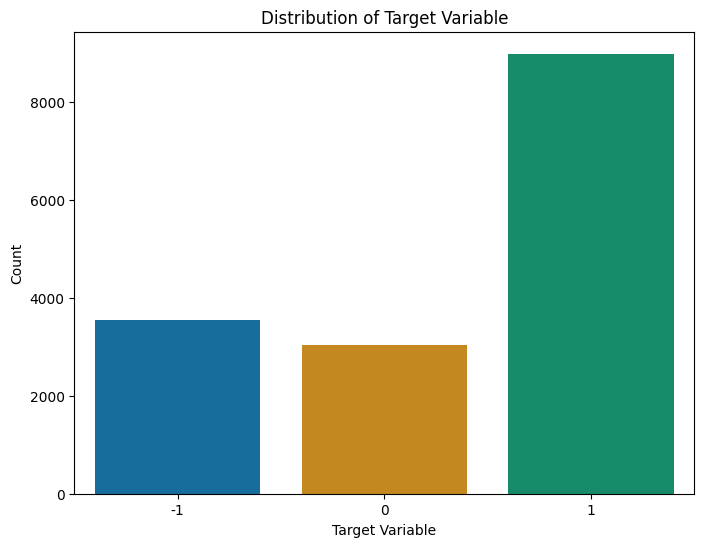

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'label' is of integer type
df['label'] = df['label'].astype(int)

# Plot the distribution of the target variable 'label'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label', palette='colorblind', hue='label', legend=False, order=[-1, 0, 1])

# Add labels and title
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['-1', '0', '1'])
plt.show()


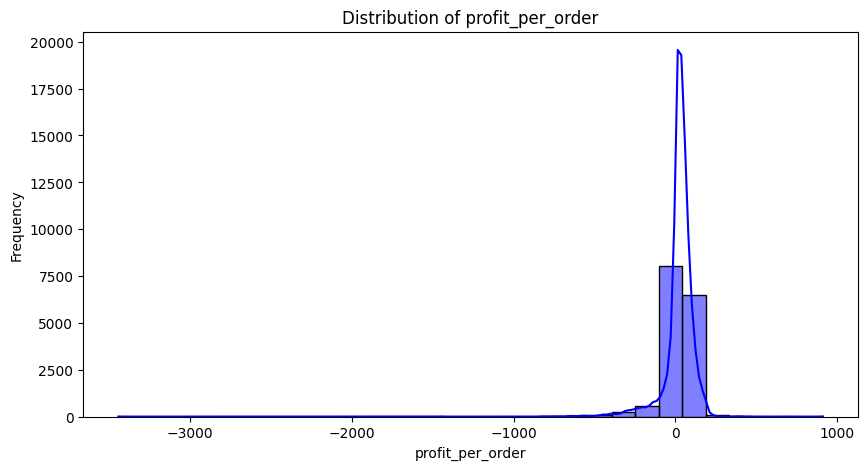

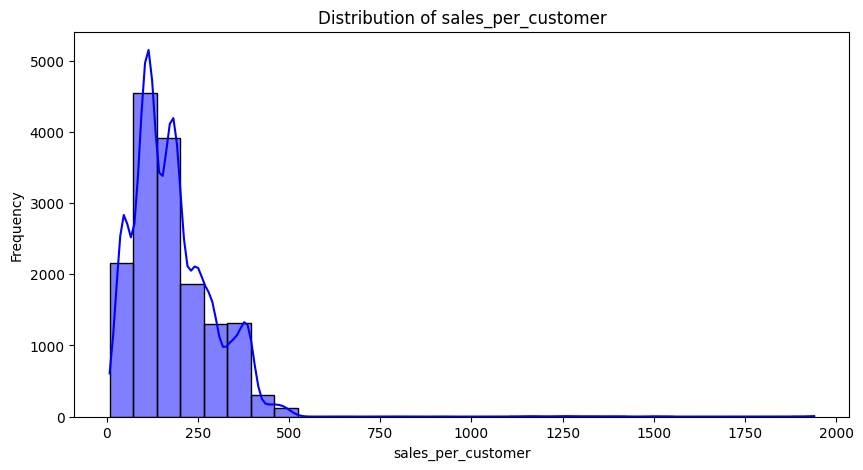

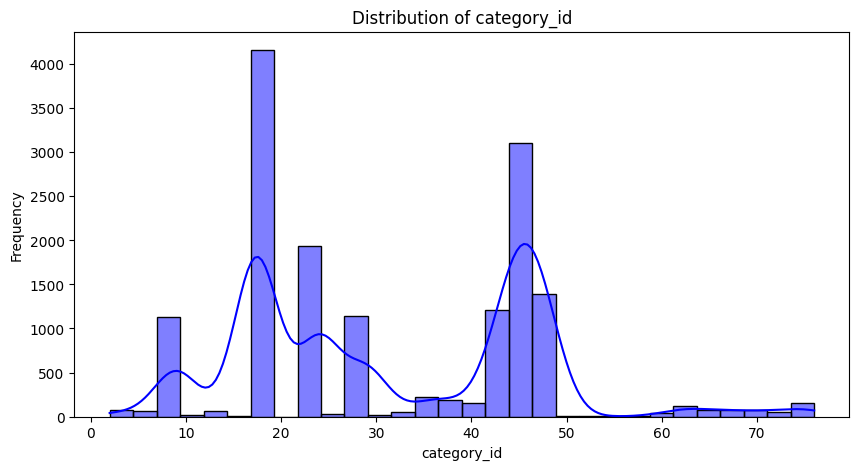

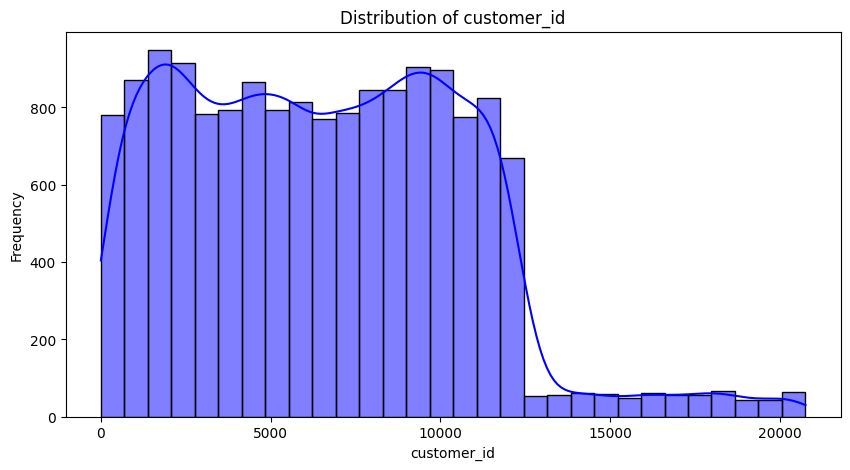

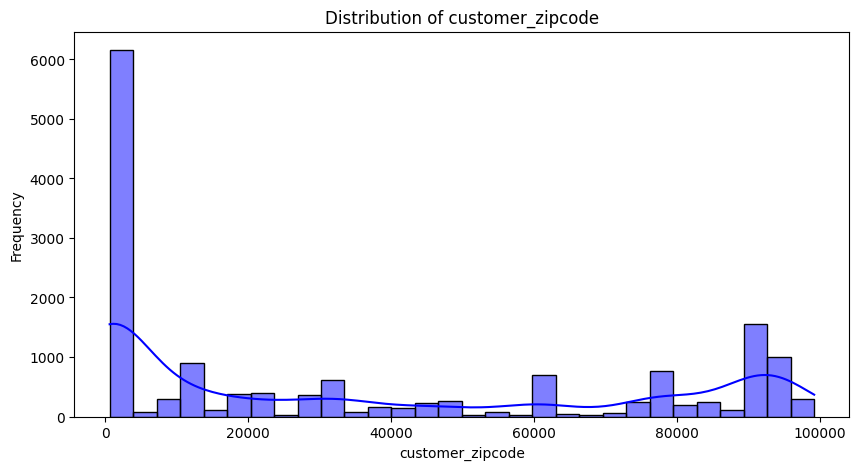

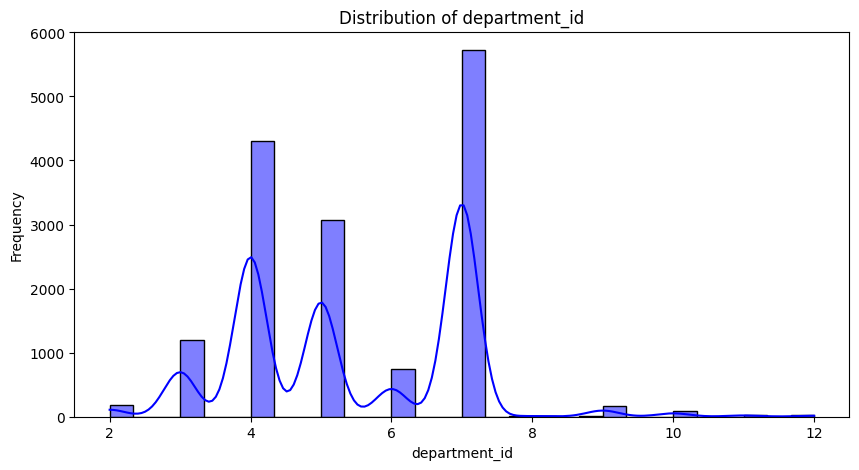

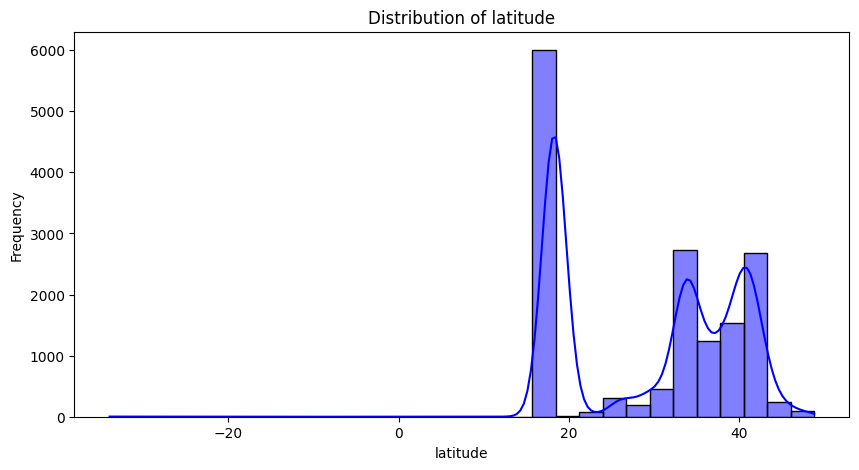

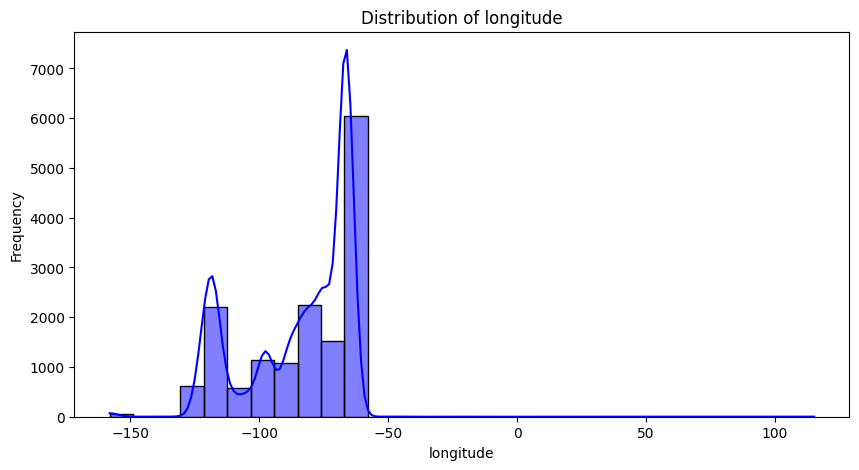

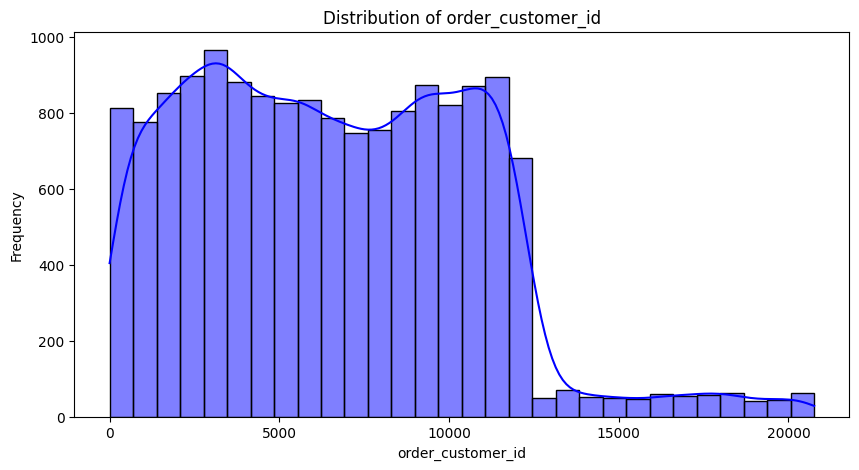

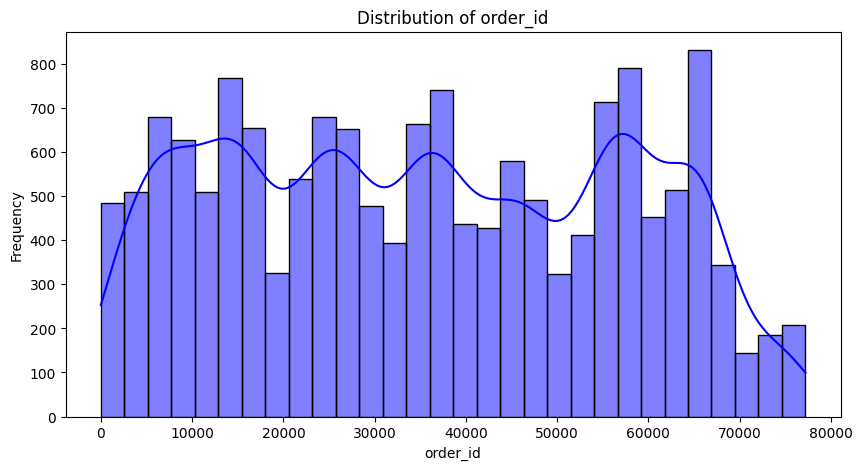

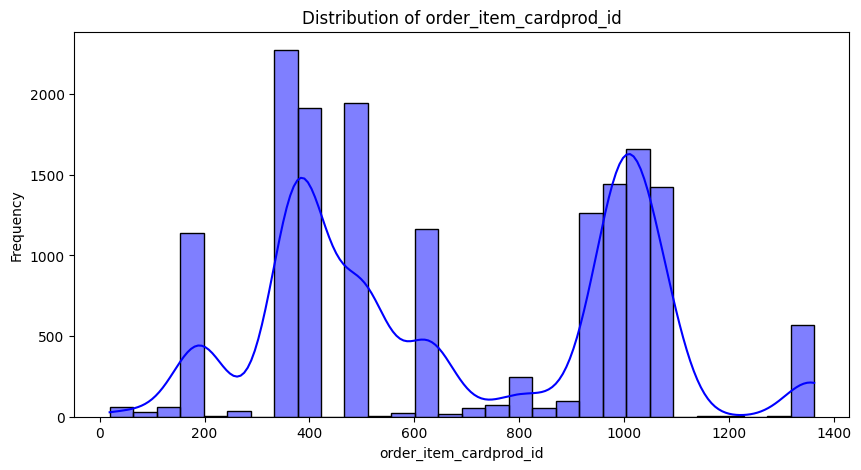

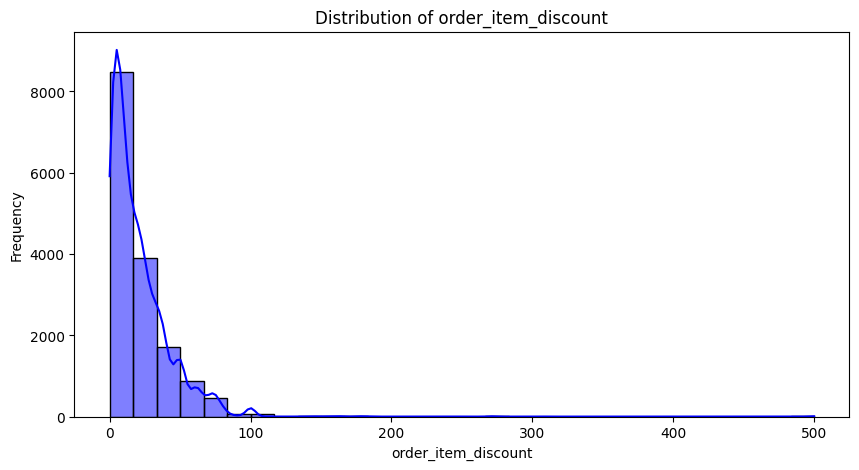

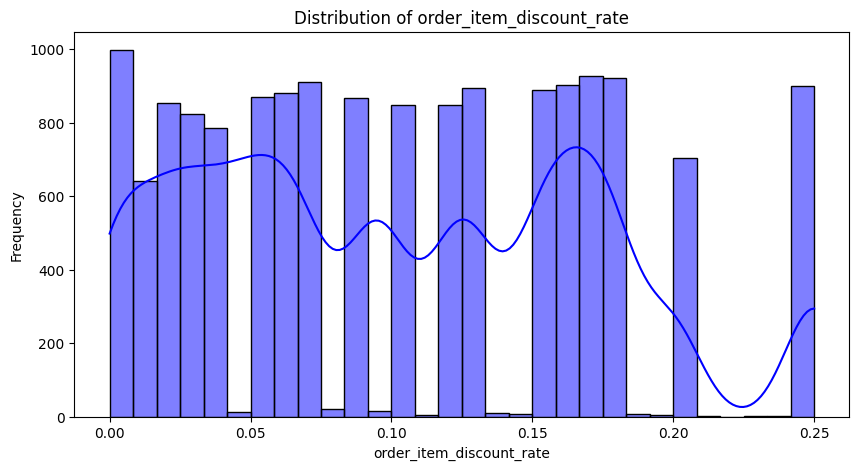

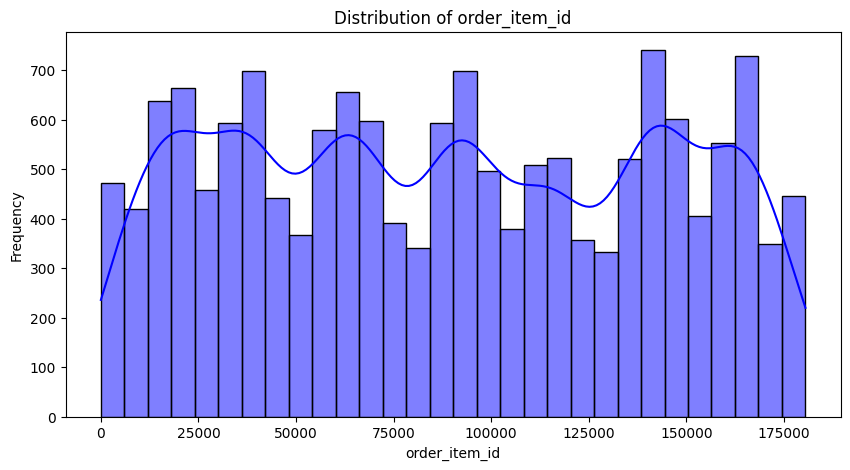

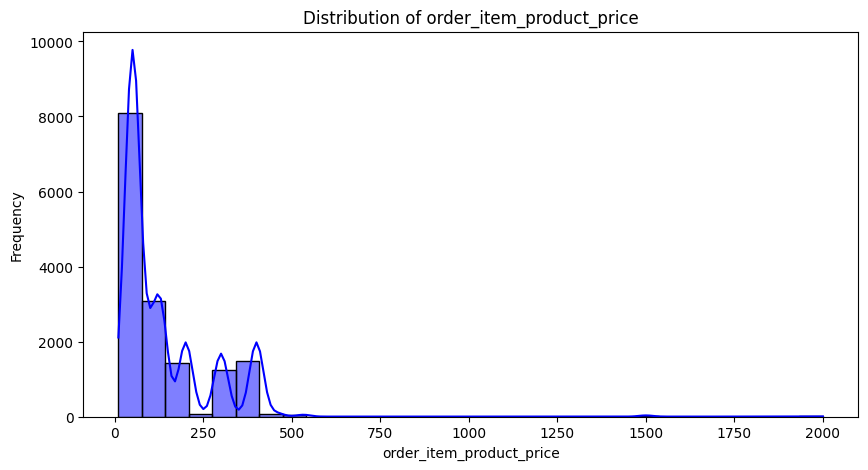

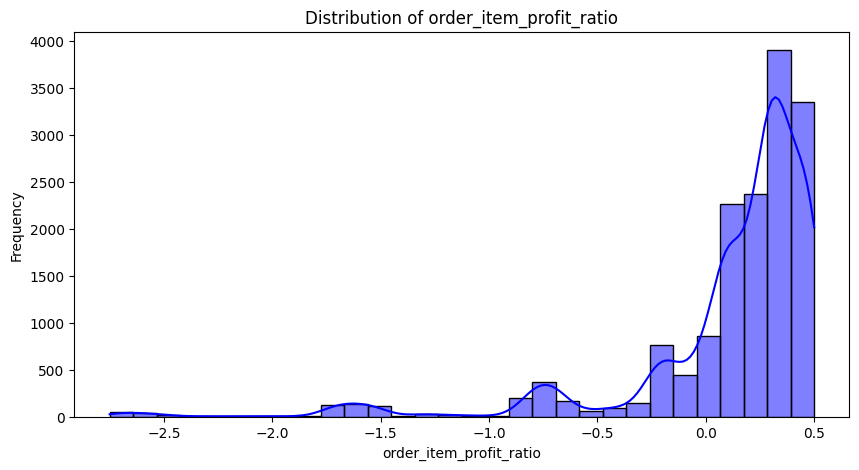

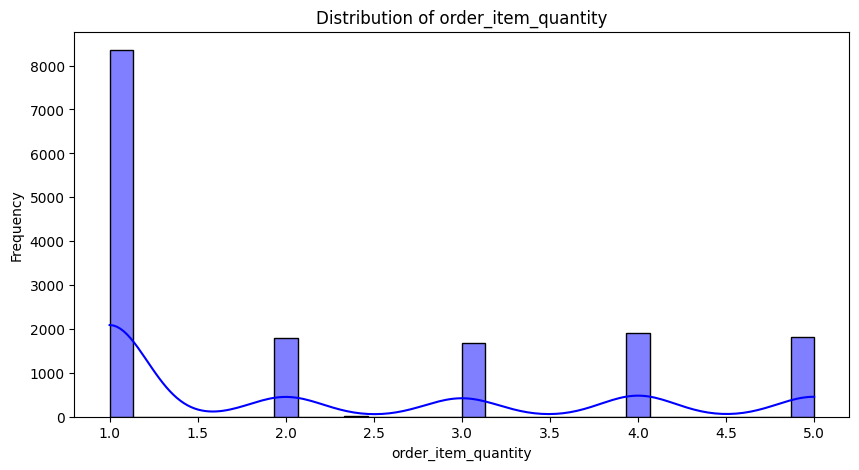

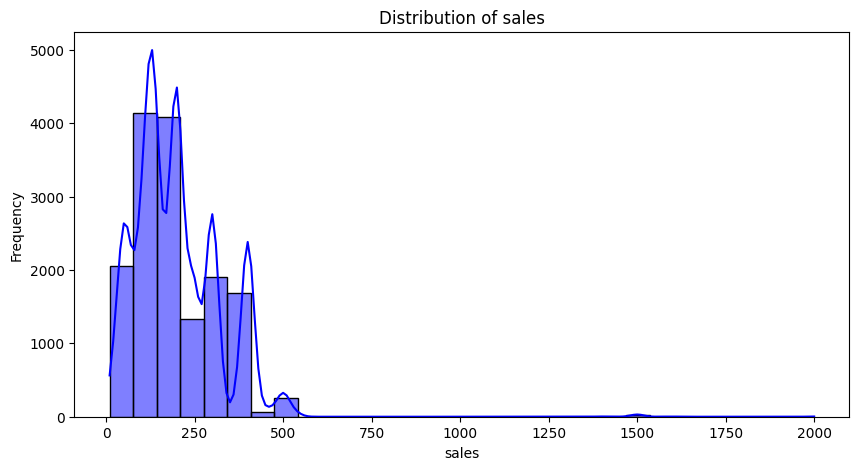

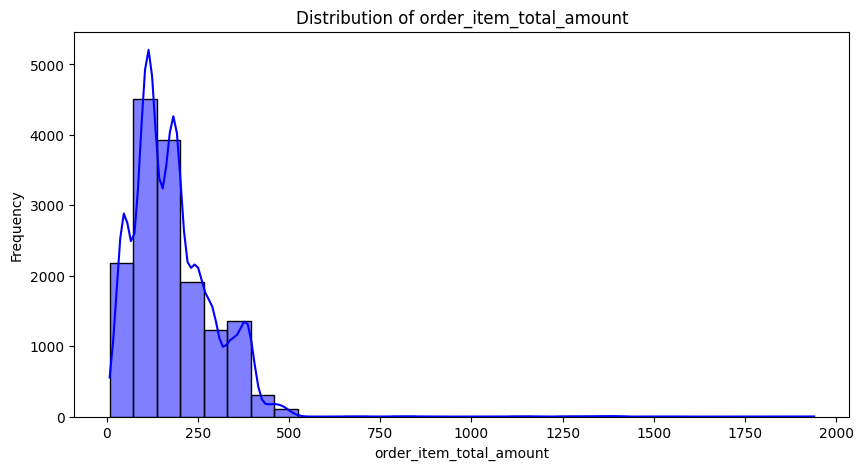

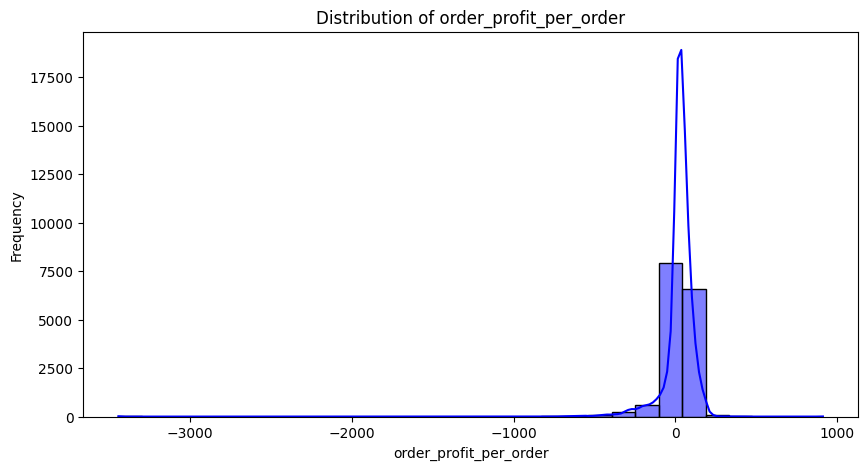

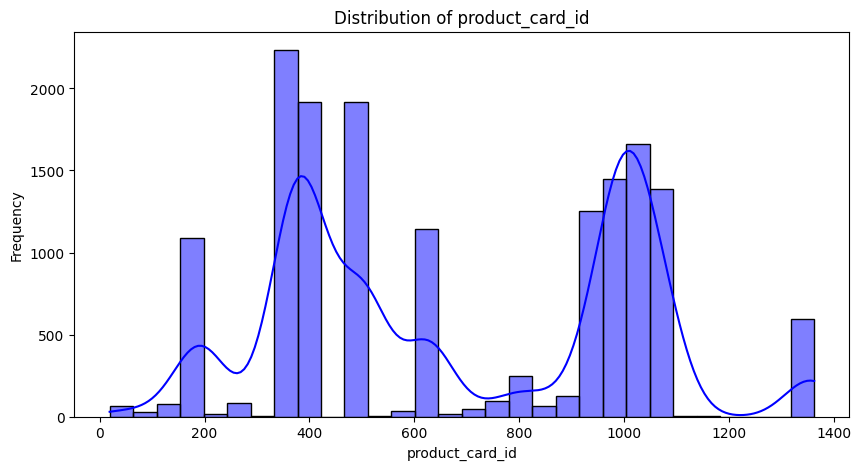

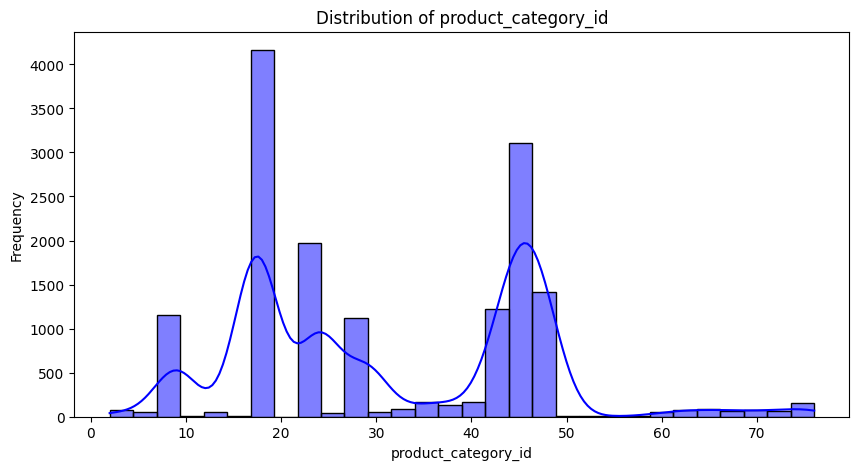

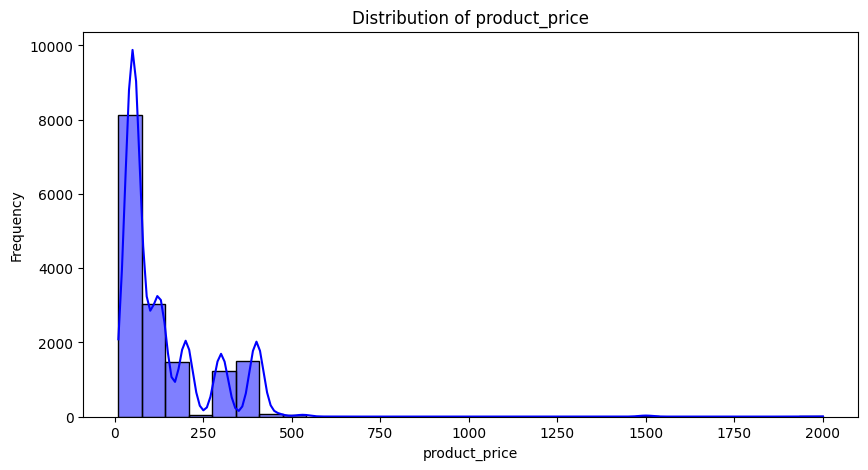

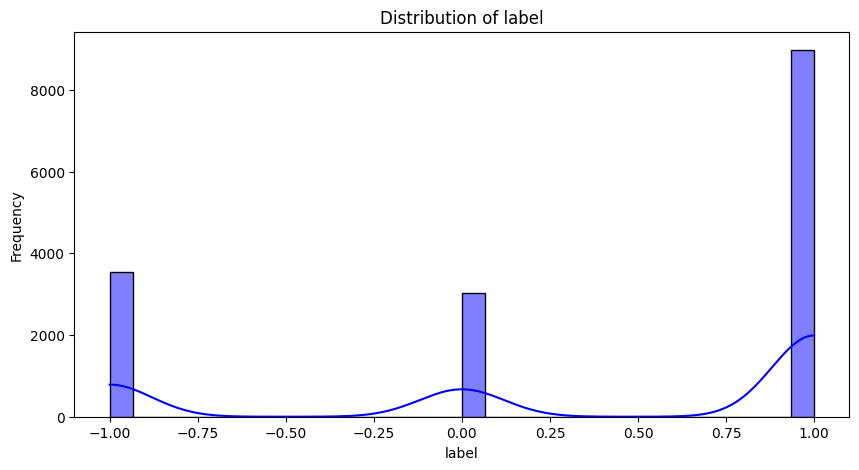

In [34]:
# Plot histograms for each numerical feature
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [35]:
# Ensure 'label' is of integer type
df['label'] = df['label'].astype(int)

# Check the class distribution
print("Class Distribution before balancing:\n", df['label'].value_counts())

# Handling the class imbalance by removing excess rows of class 1
class_counts = df['label'].value_counts()
min_class_count = class_counts.min()  # This will be the number of rows to keep for all classes

# Randomly sample 'min_class_count' rows from class 1
df_class1 = df[df['label'] == 1].sample(n=min_class_count, random_state=42)
df_class_minus1 = df[df['label'] == -1]
df_class0 = df[df['label'] == 0]

# Combine the balanced dataset
df_balanced = pd.concat([df_class1, df_class_minus1, df_class0], axis=0)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print("Class Distribution after balancing:\n", df_balanced['label'].value_counts())


Class Distribution before balancing:
 label
 1    8976
-1    3545
 0    3028
Name: count, dtype: int64
Class Distribution after balancing:
 label
-1    3545
 1    3028
 0    3028
Name: count, dtype: int64


# Data Preprocessing

In [36]:
from sklearn.preprocessing import LabelEncoder
# Label encode categorical columns
label_encoders = {}
for col in df_balanced.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_balanced[col] = le.fit_transform(df_balanced[col].astype(str))
    label_encoders[col] = le

In [37]:
print(df_balanced['label'].value_counts())


label
-1    3545
 1    3028
 0    3028
Name: count, dtype: int64


# Handling Outliers

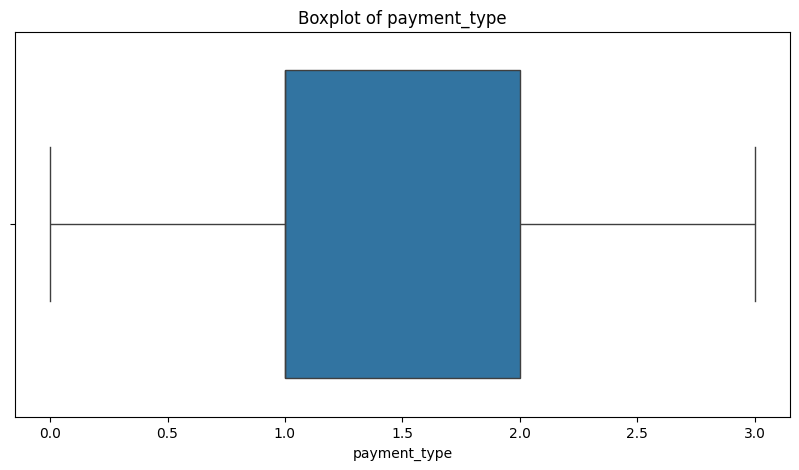

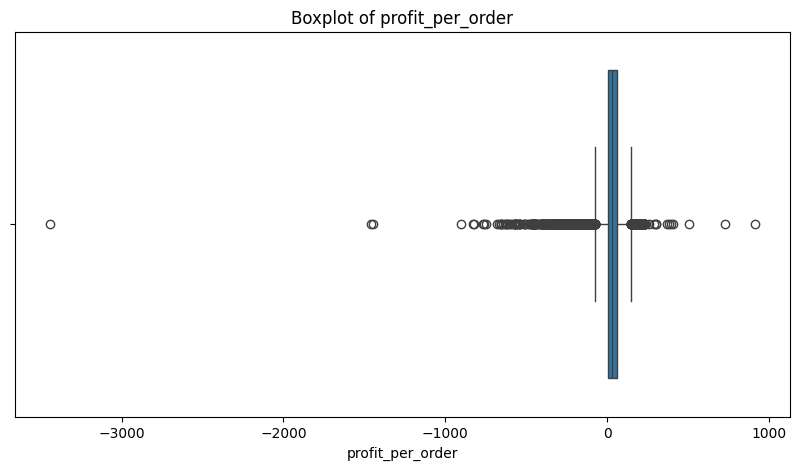

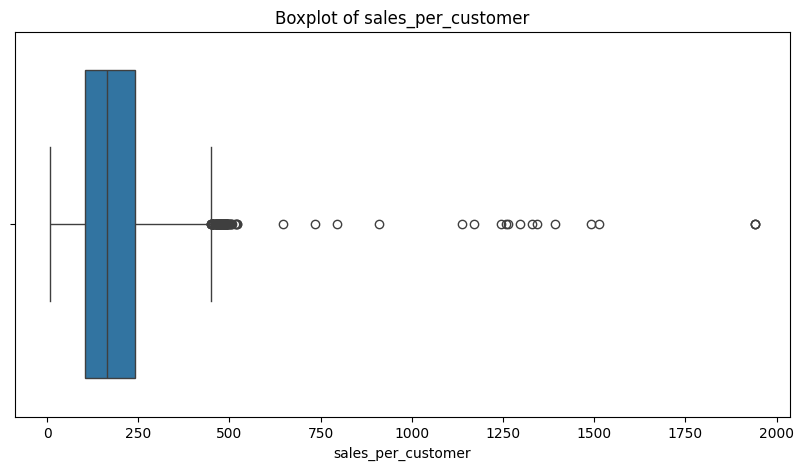

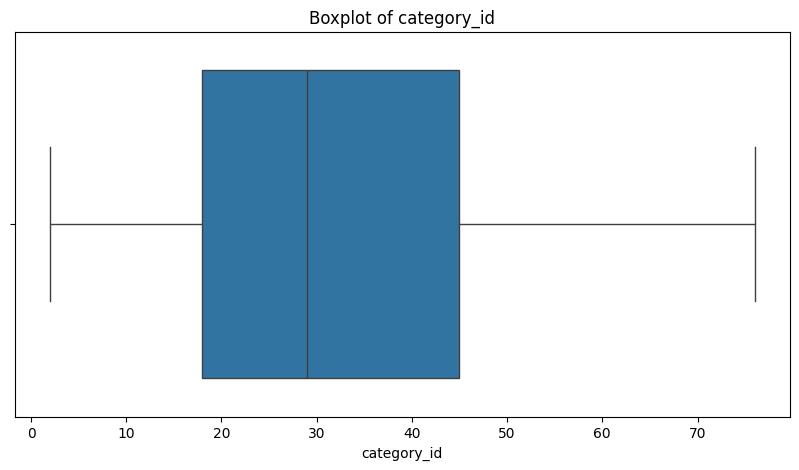

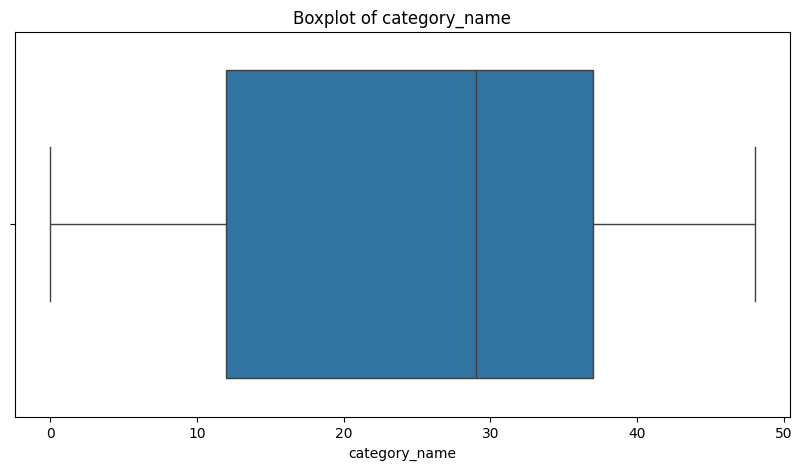

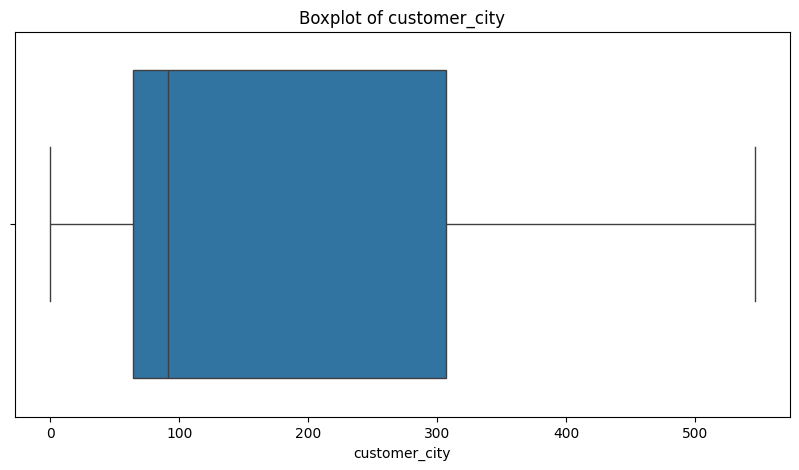

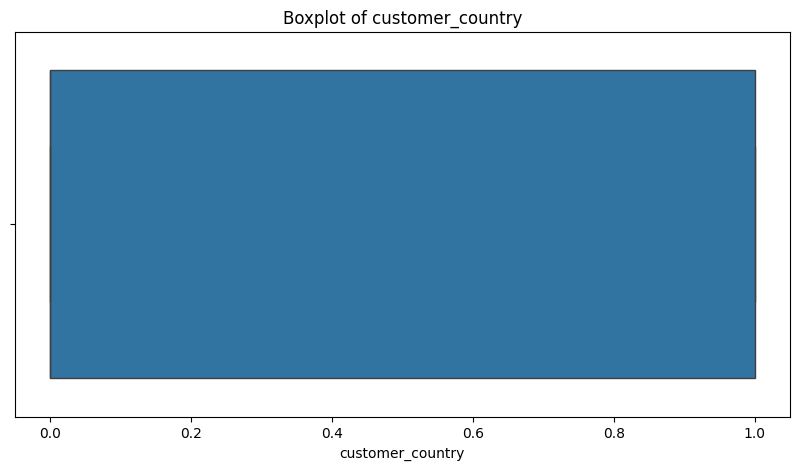

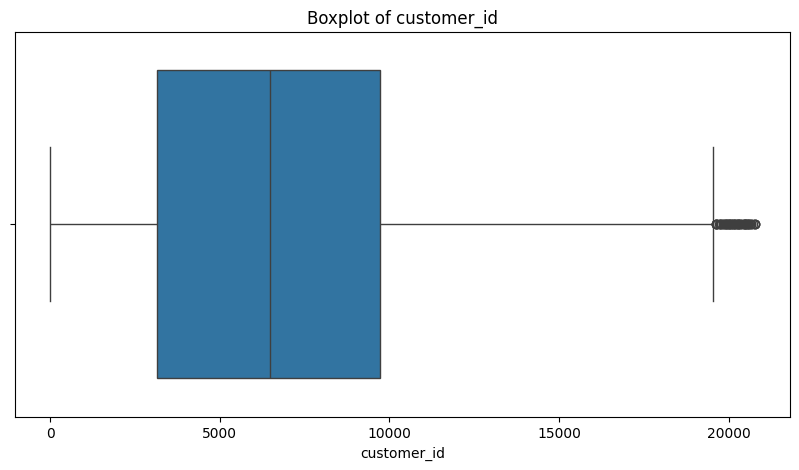

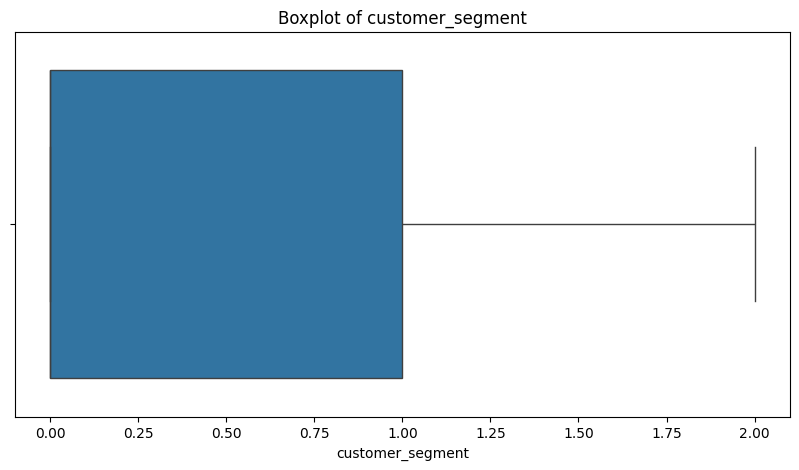

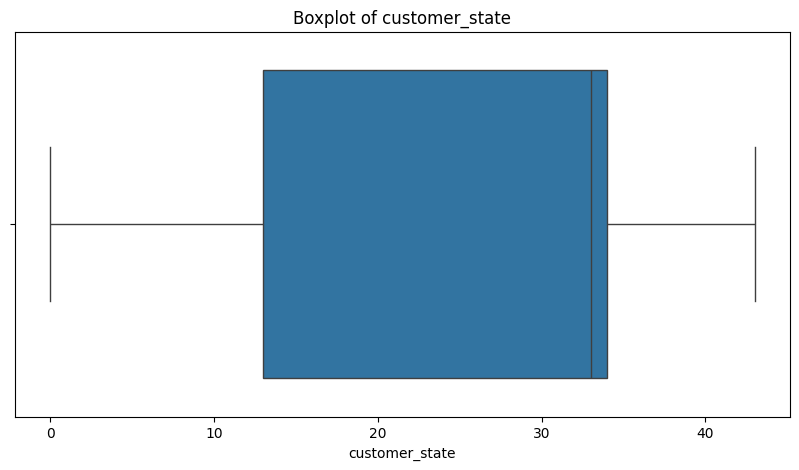

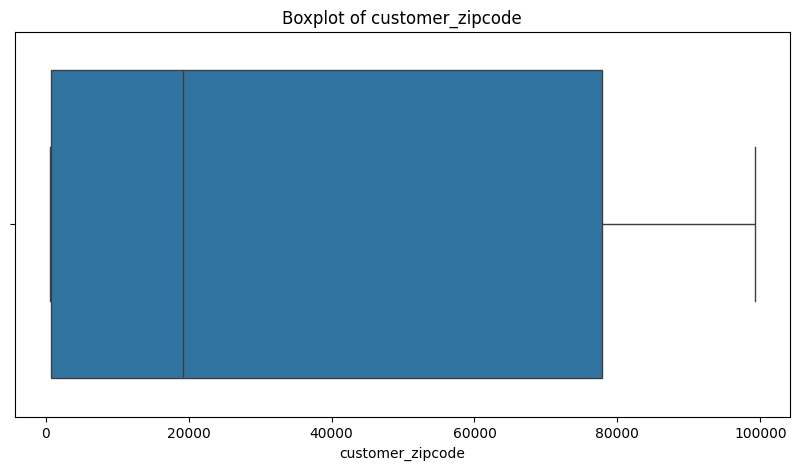

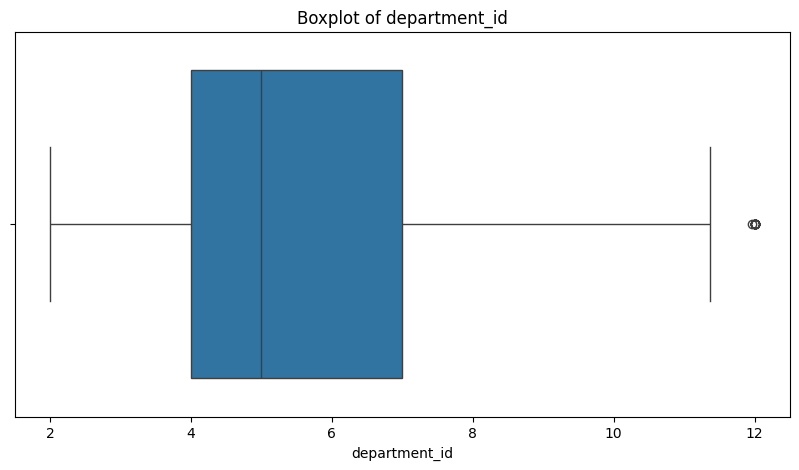

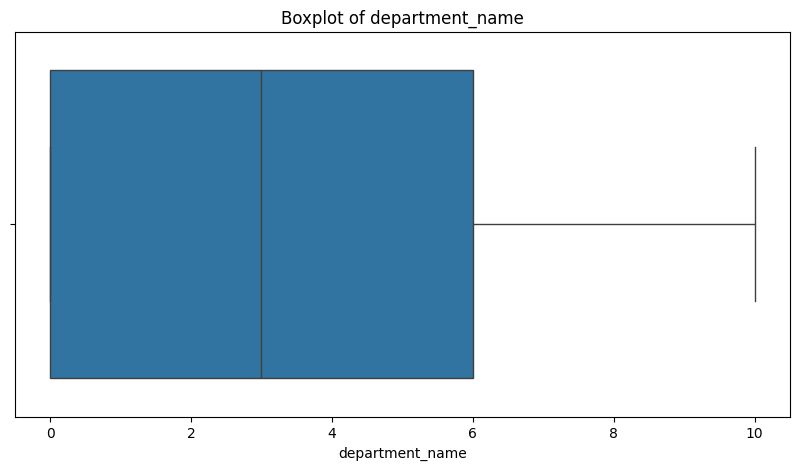

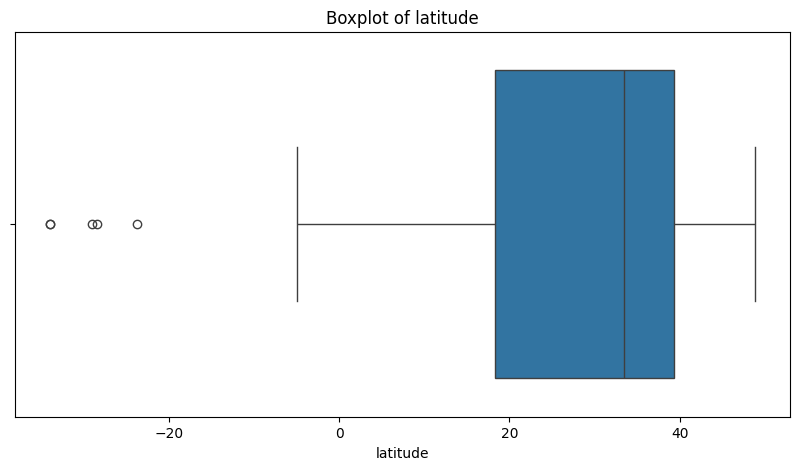

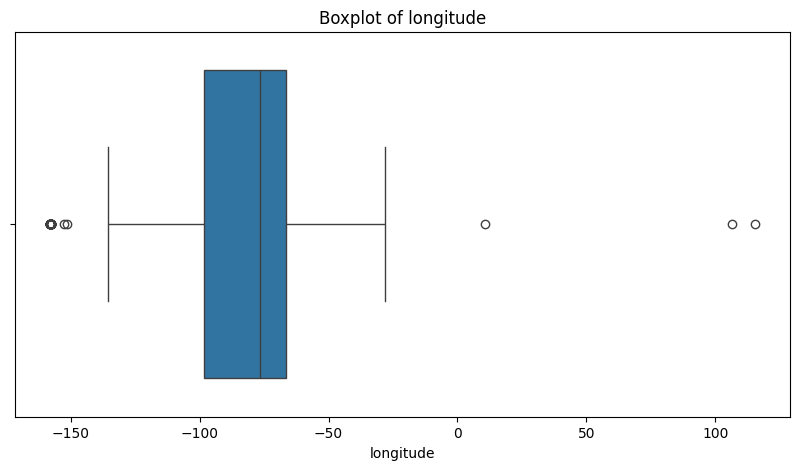

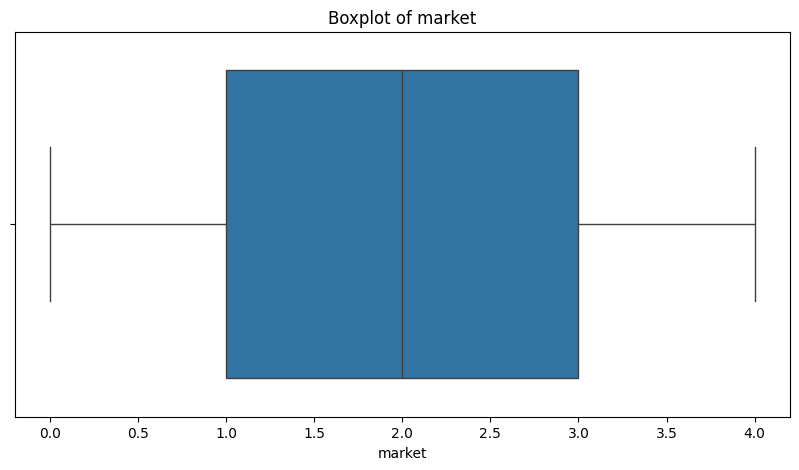

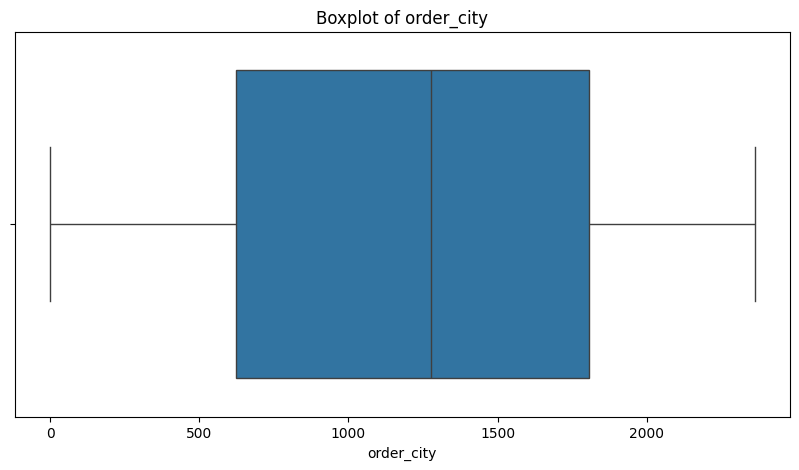

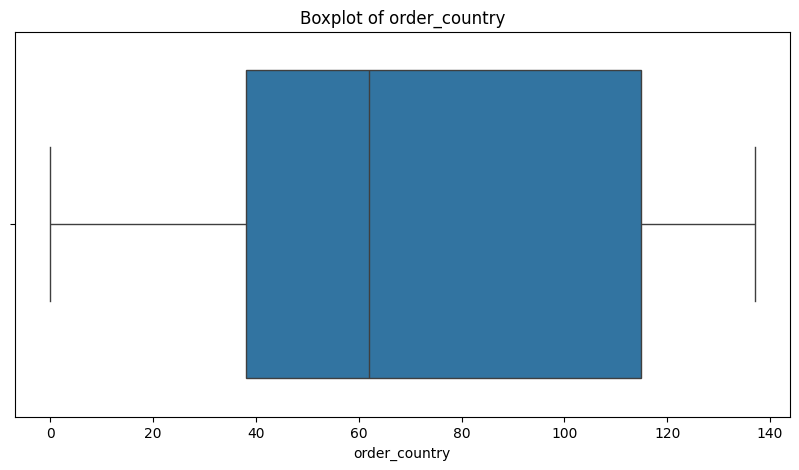

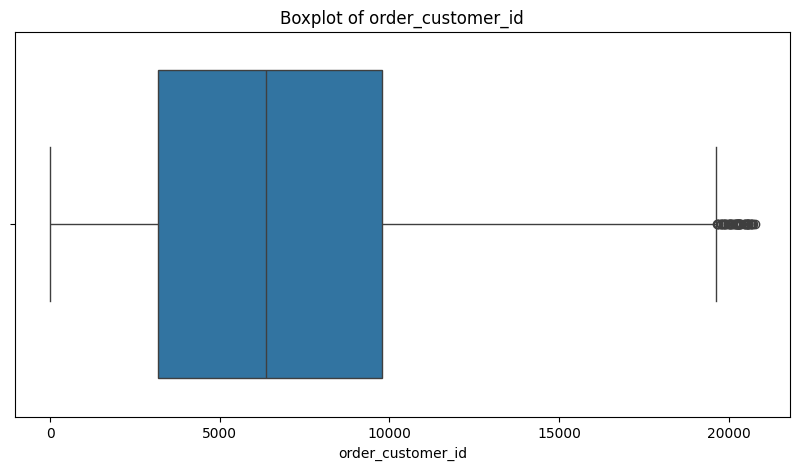

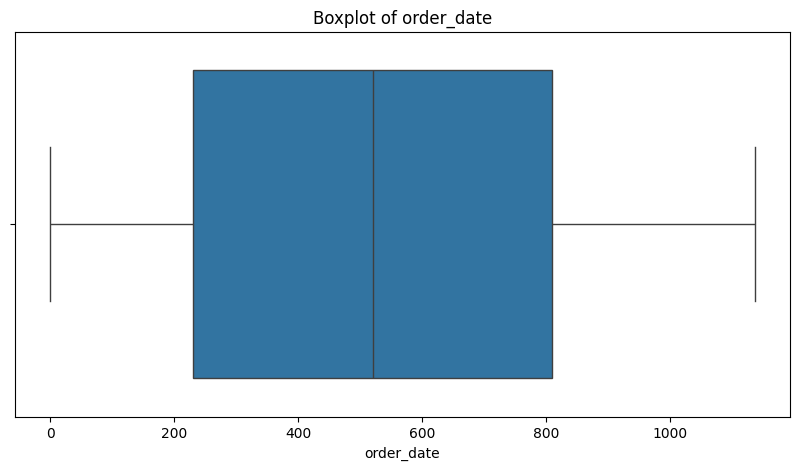

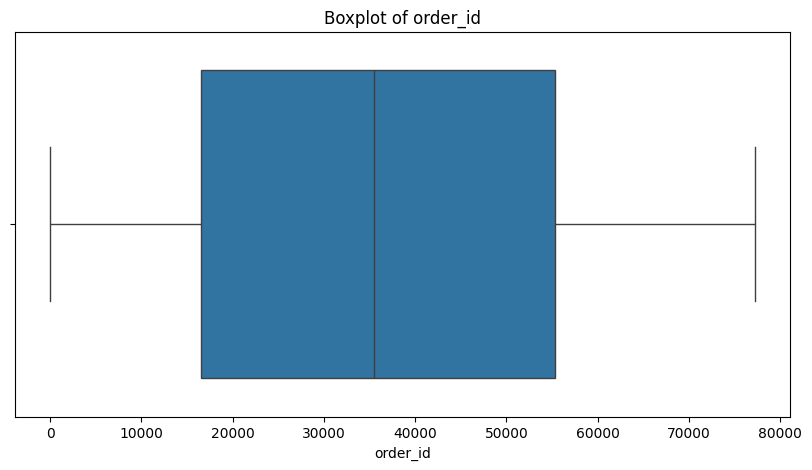

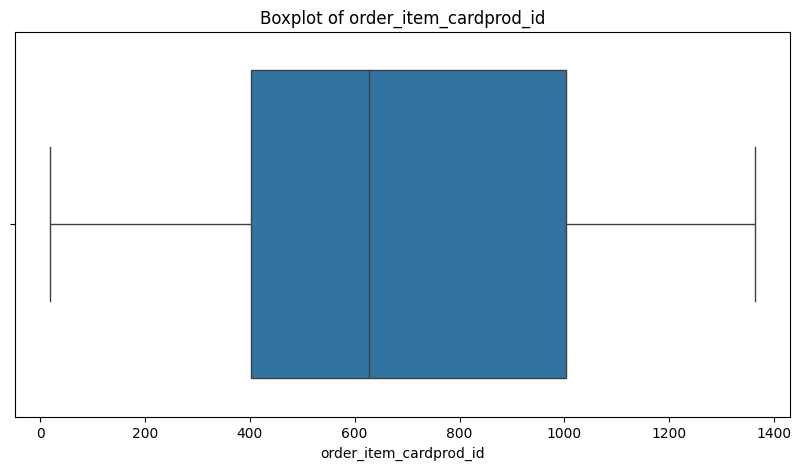

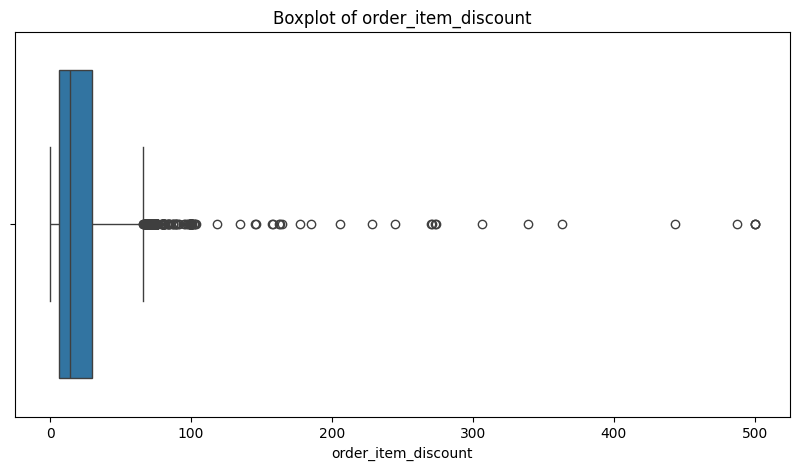

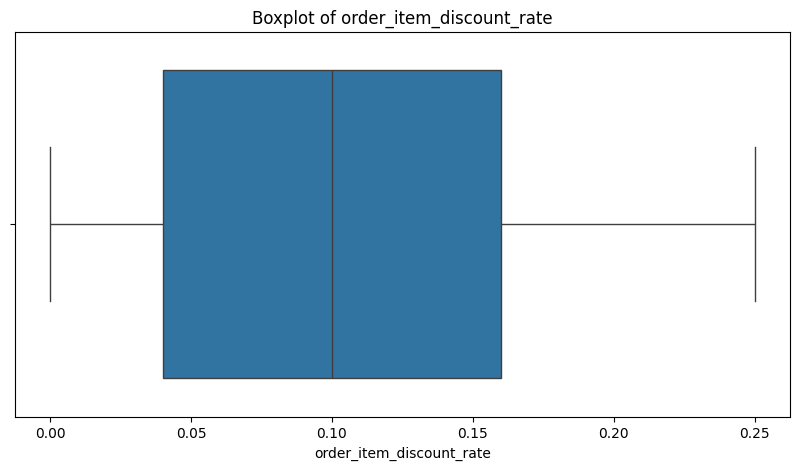

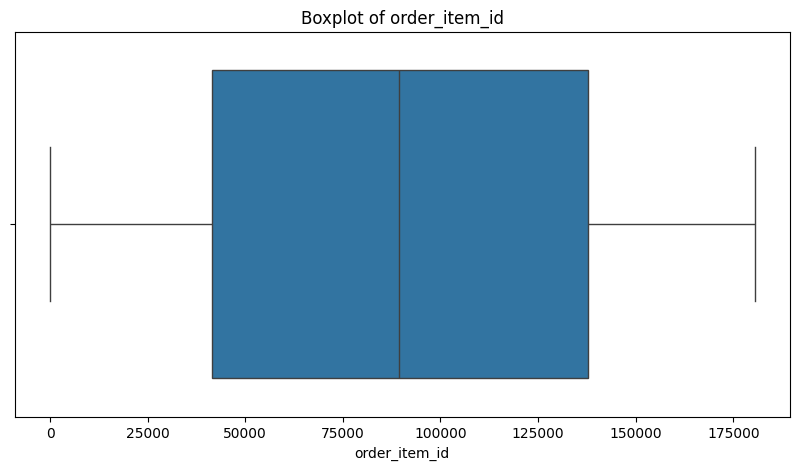

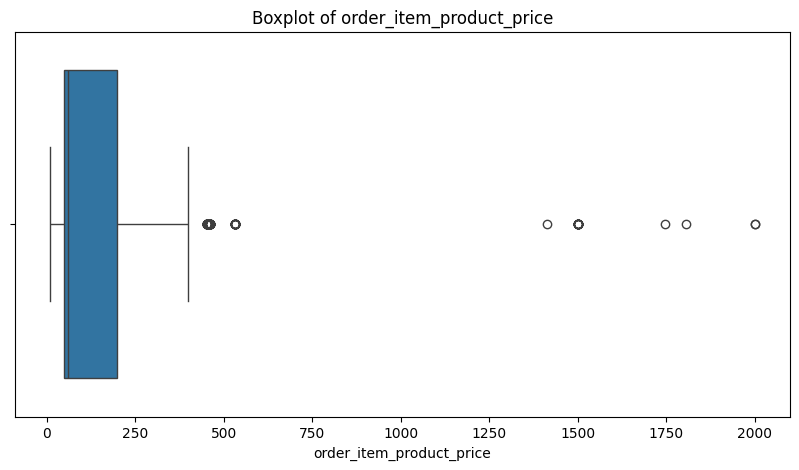

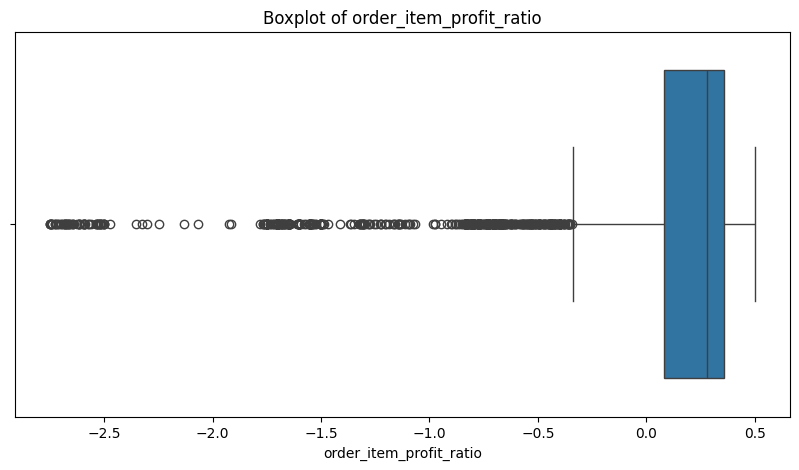

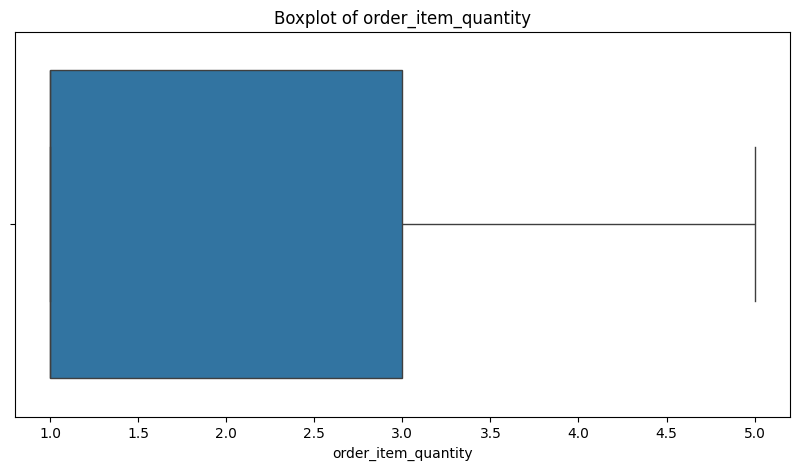

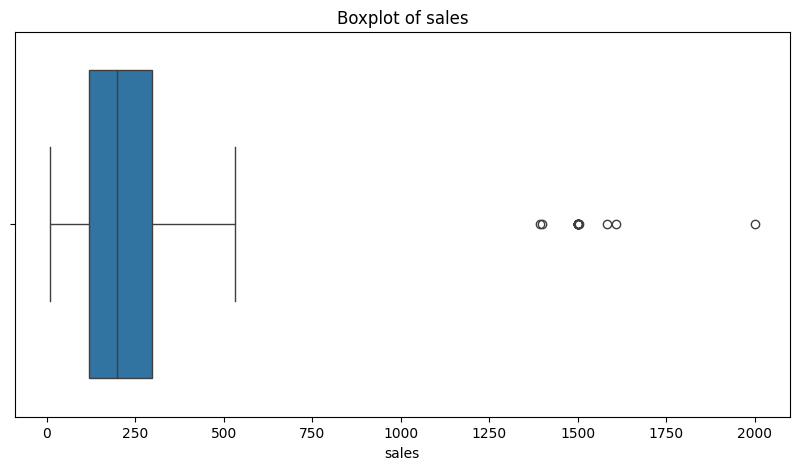

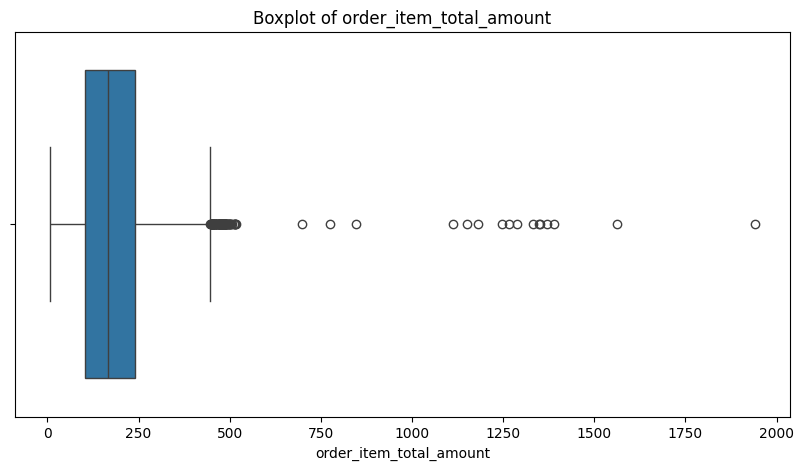

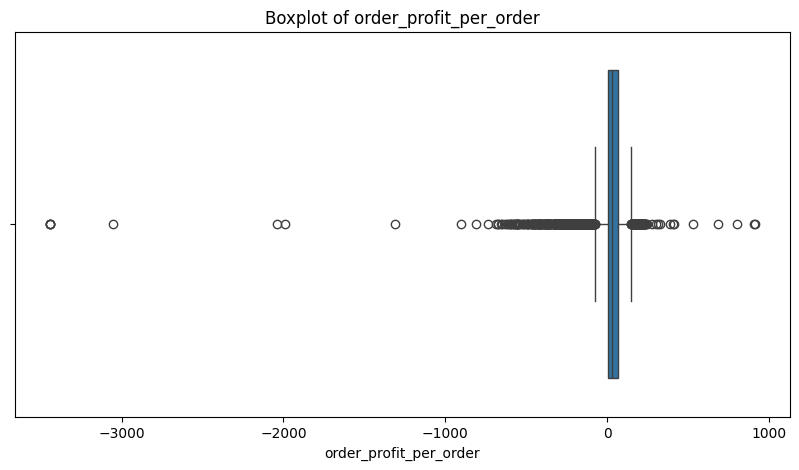

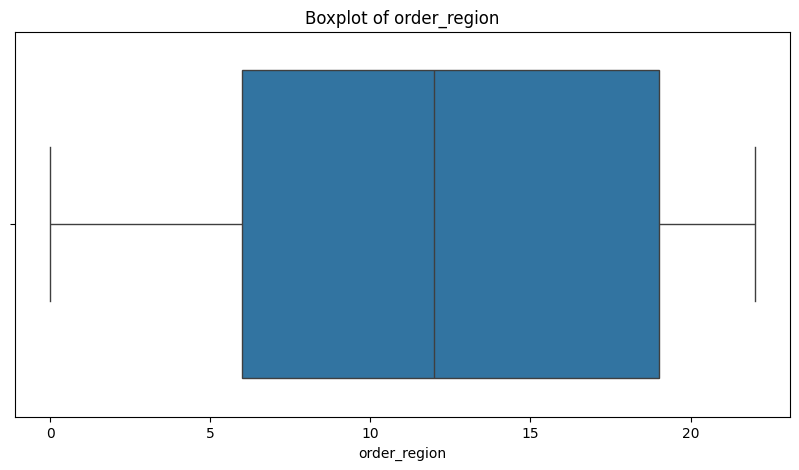

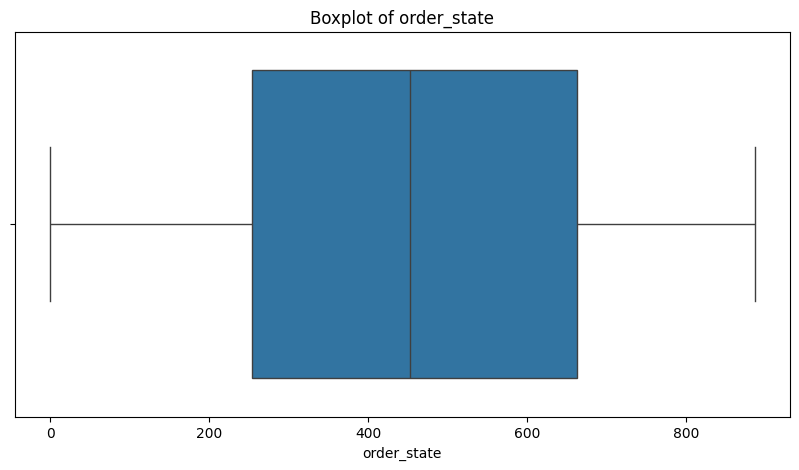

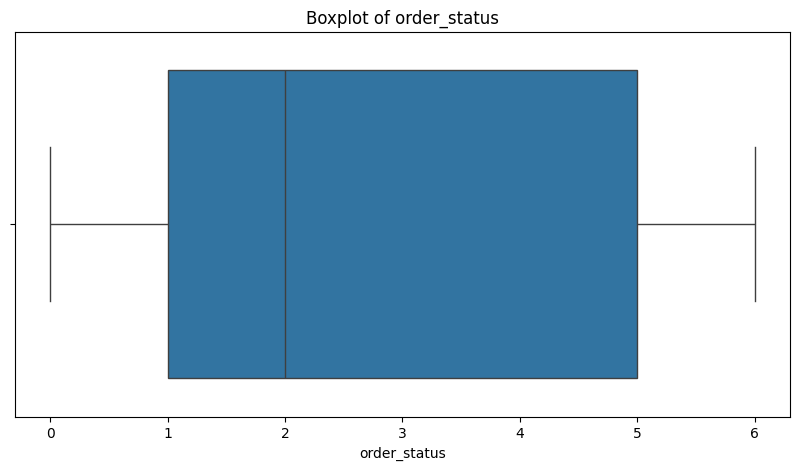

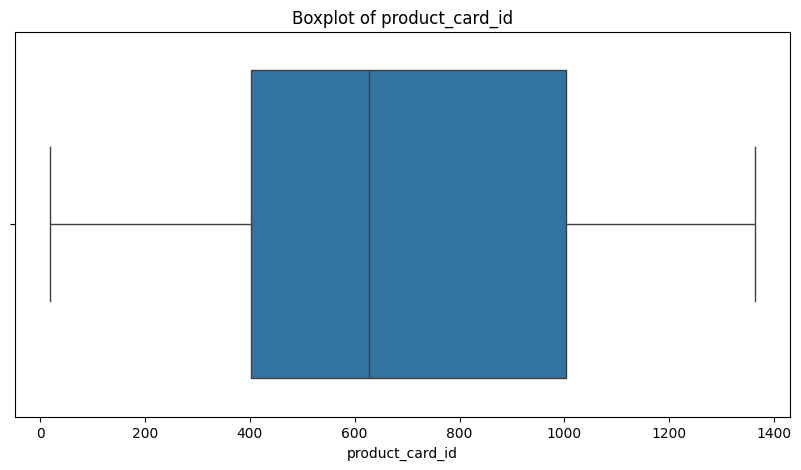

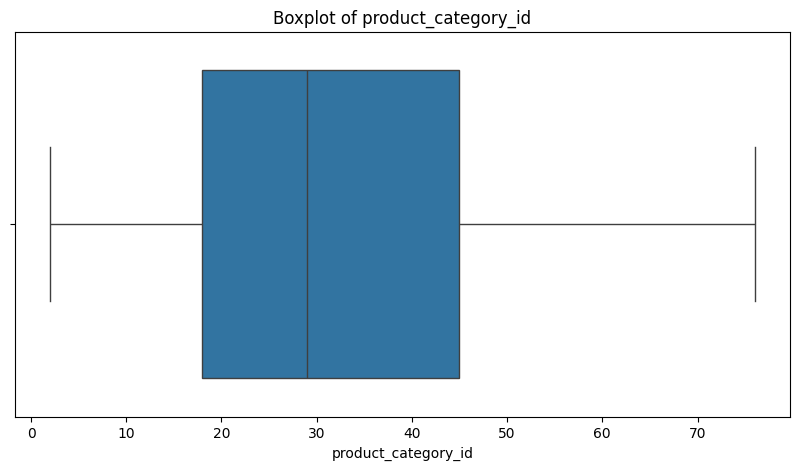

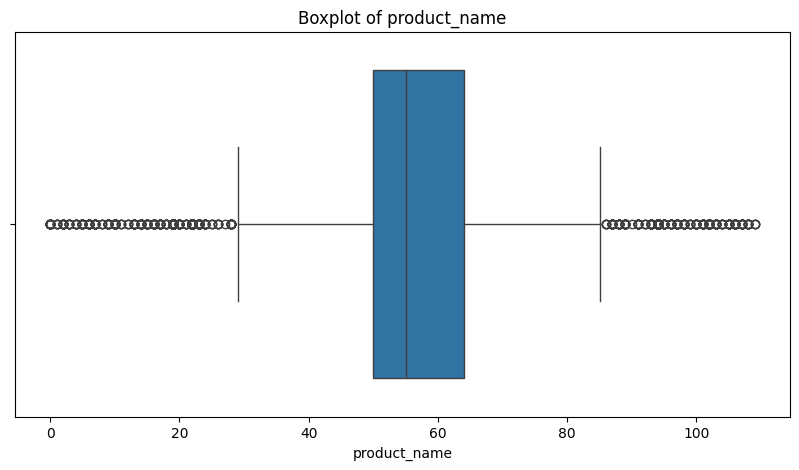

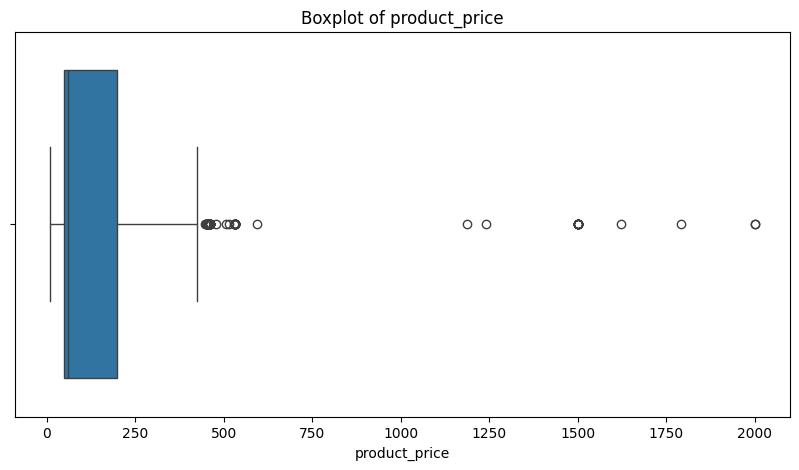

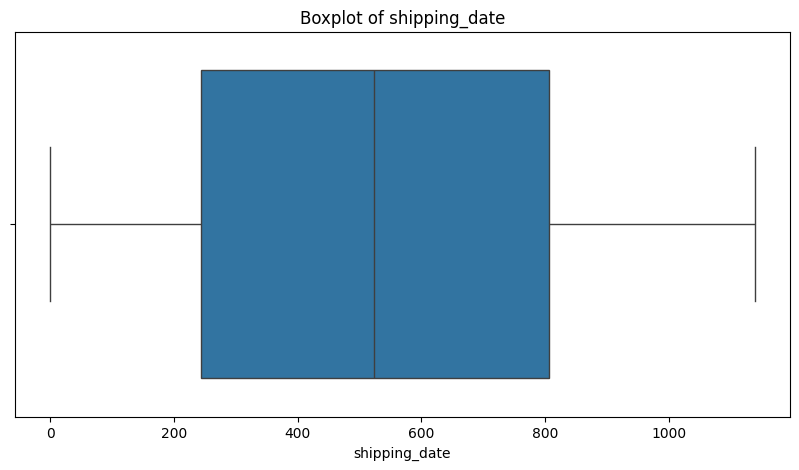

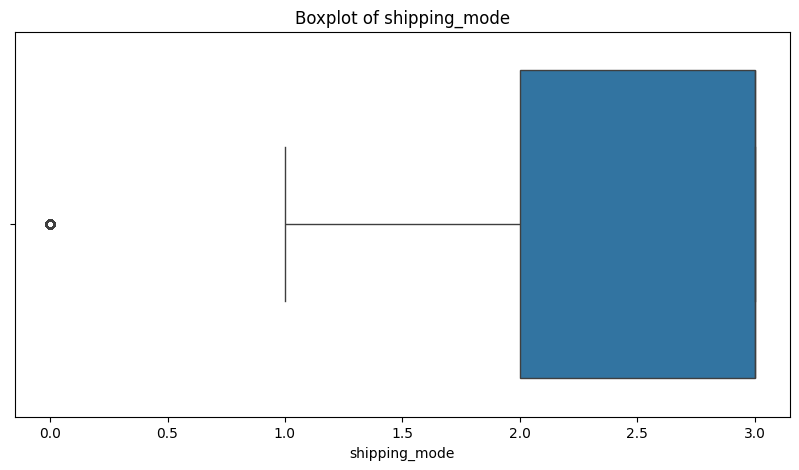

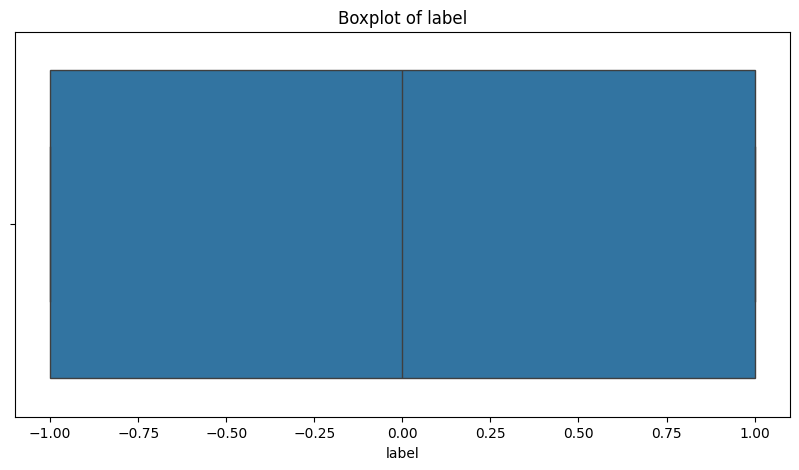

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical columns
numerical_columns = df_balanced.select_dtypes(include=['float64', 'int64']).columns

# Visualize outliers using boxplots
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_balanced[column])
    plt.title(f'Boxplot of {column}')
    plt.show()



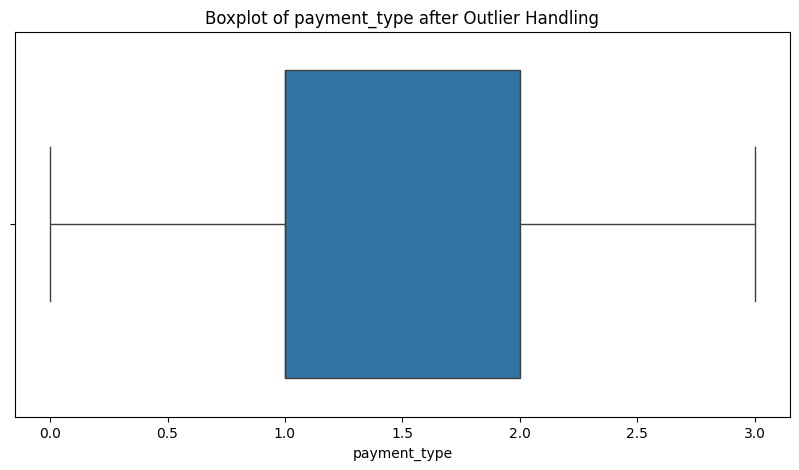

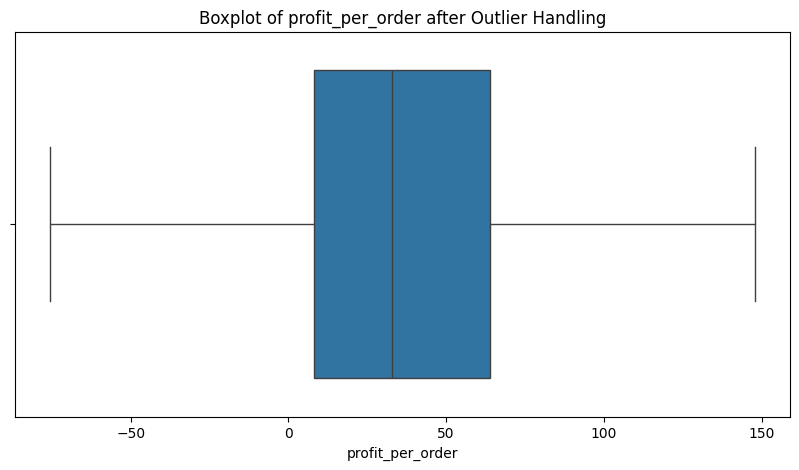

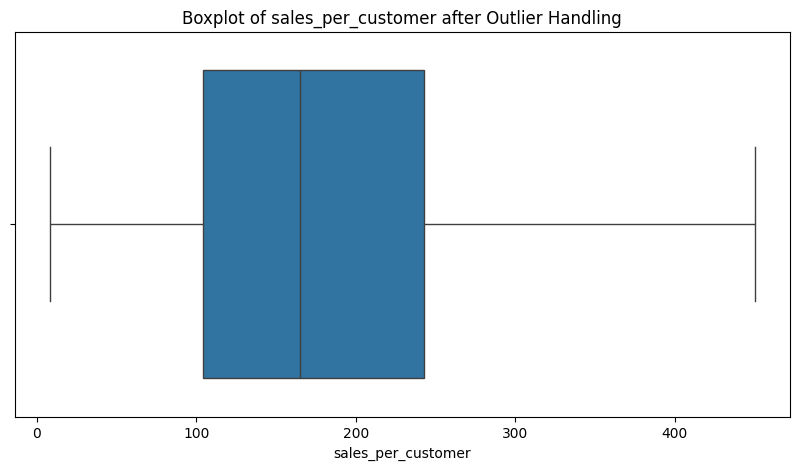

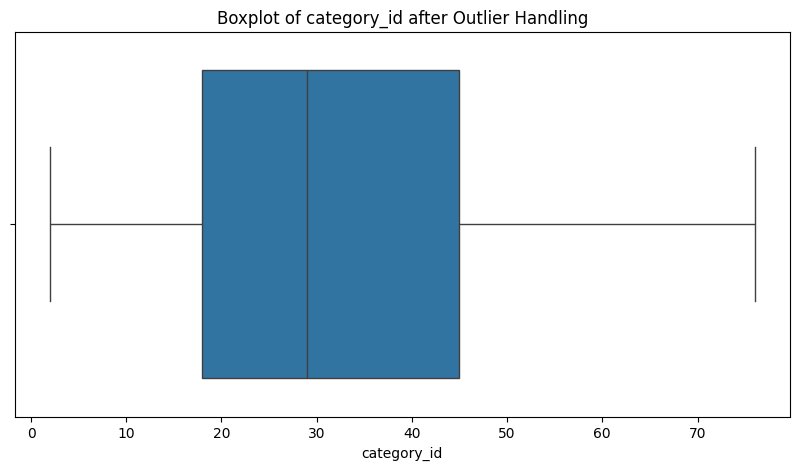

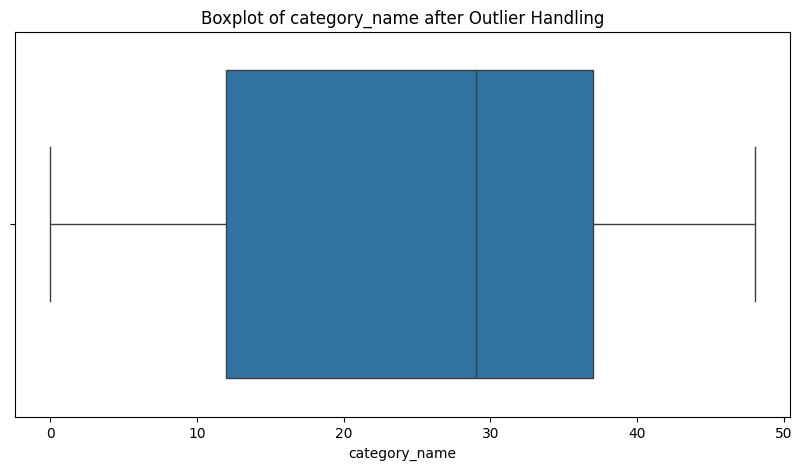

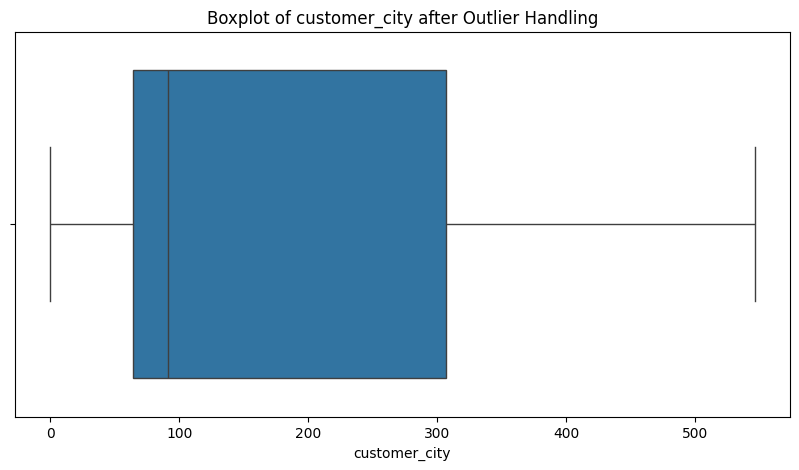

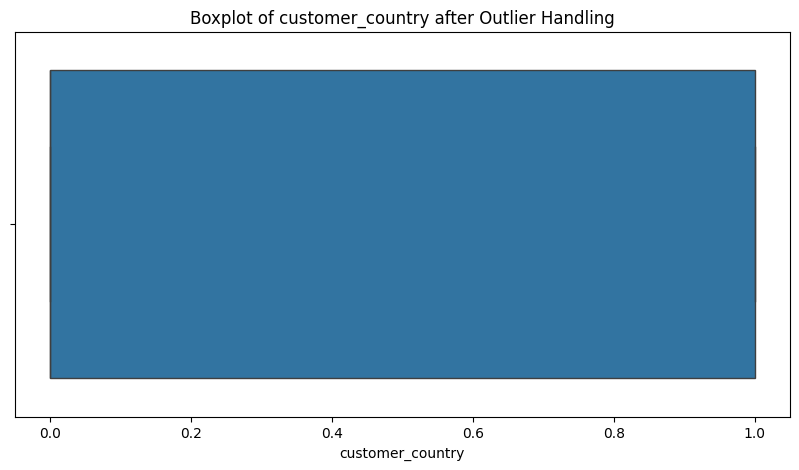

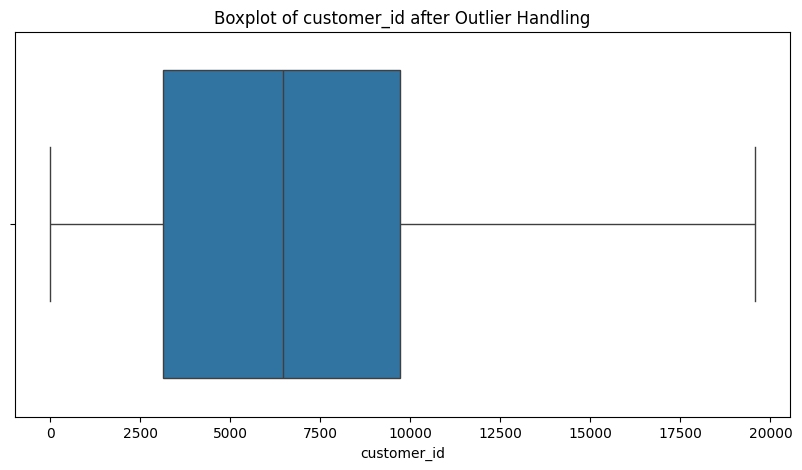

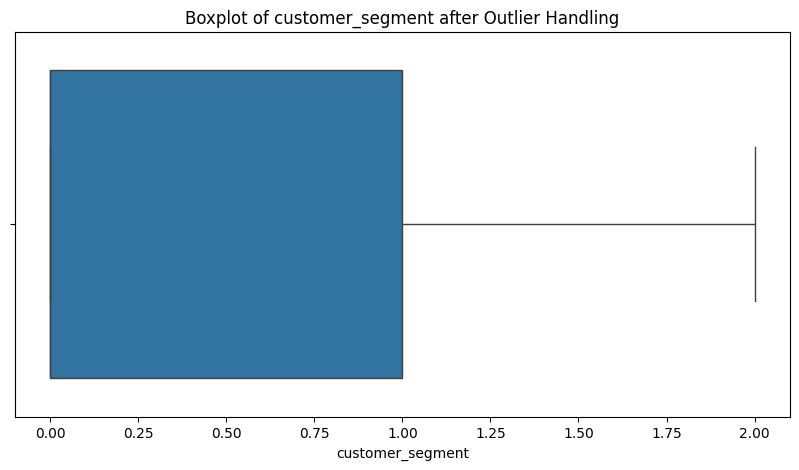

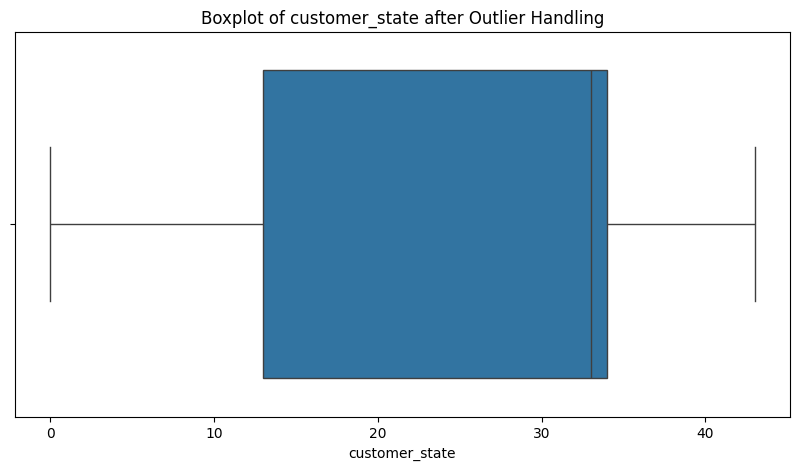

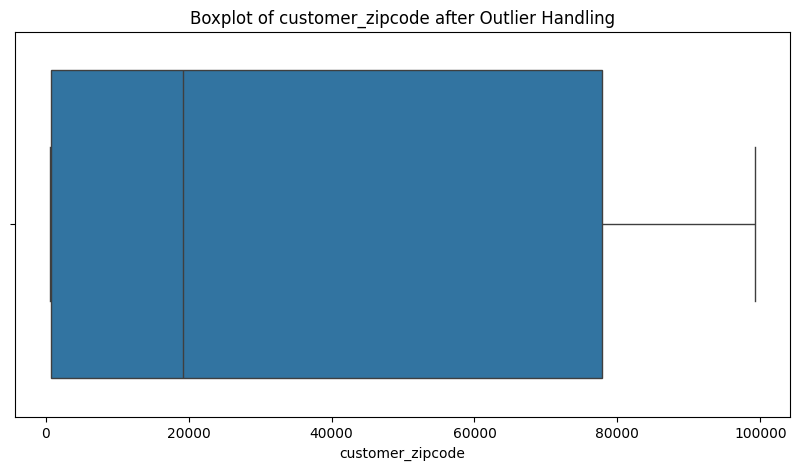

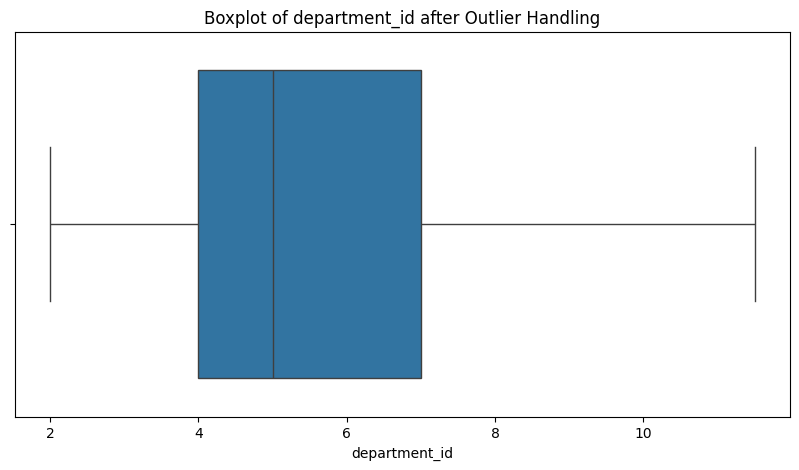

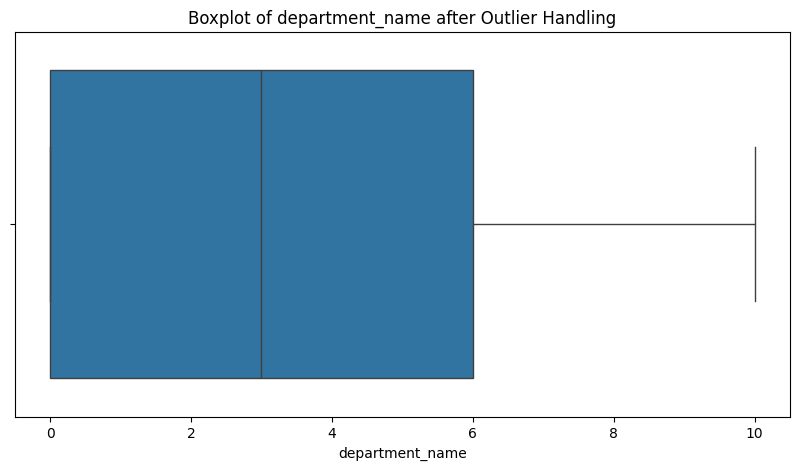

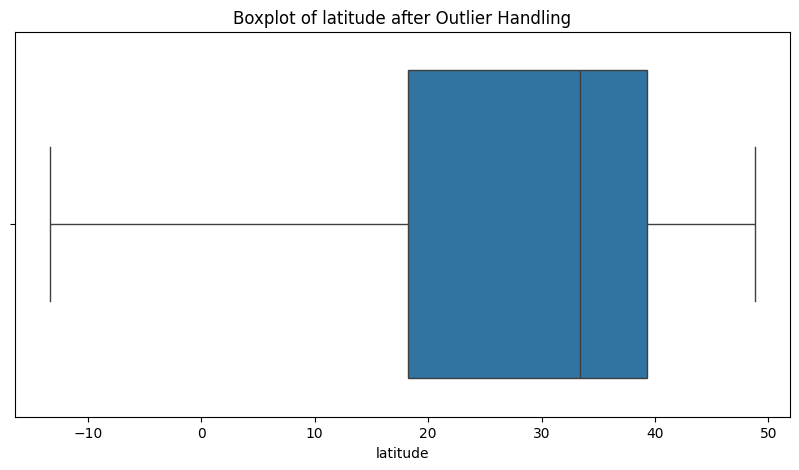

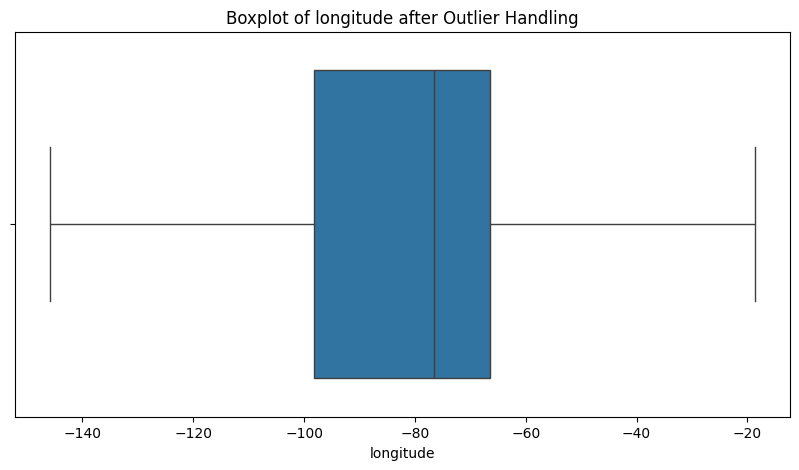

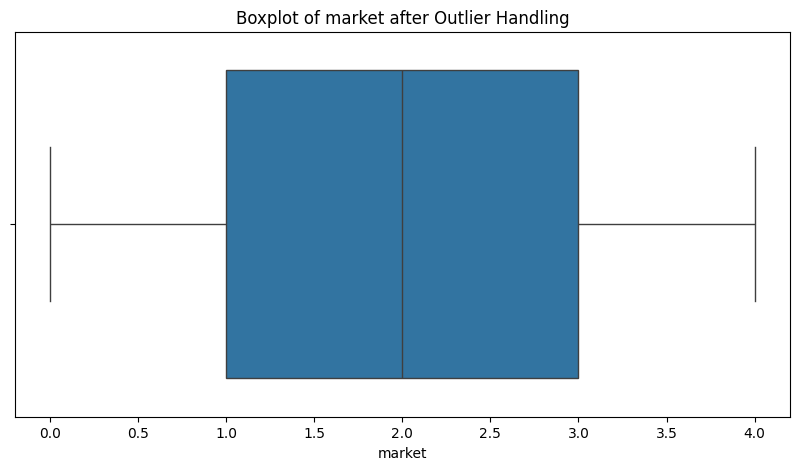

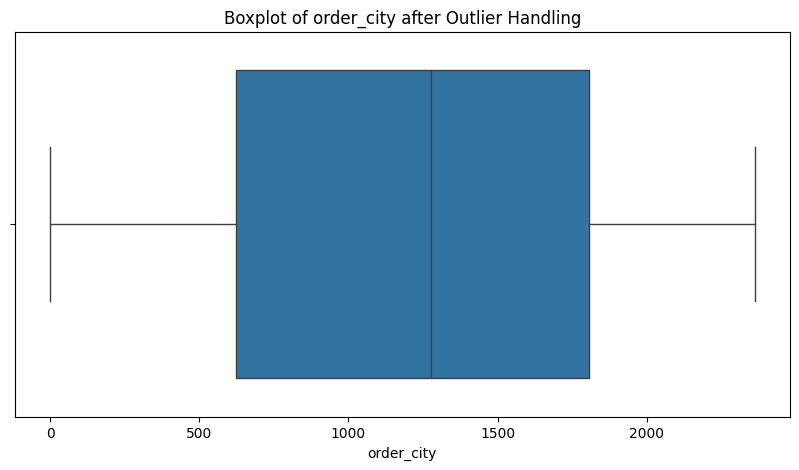

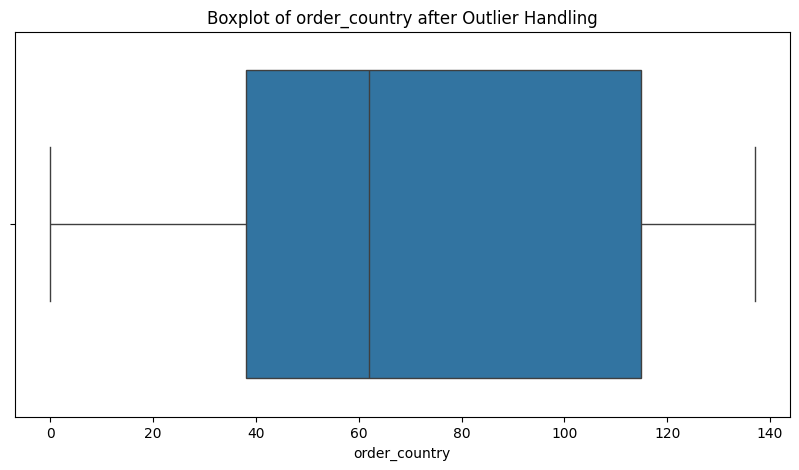

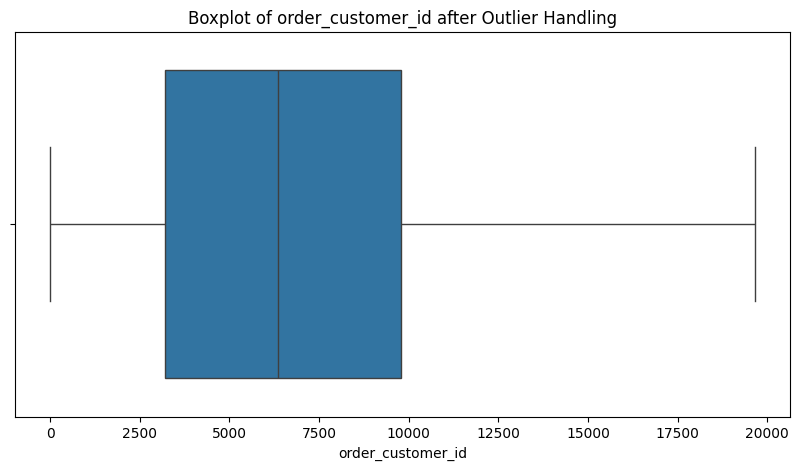

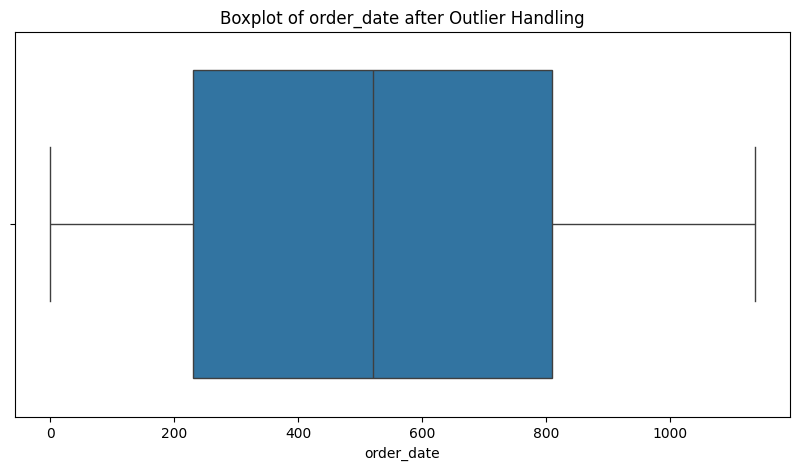

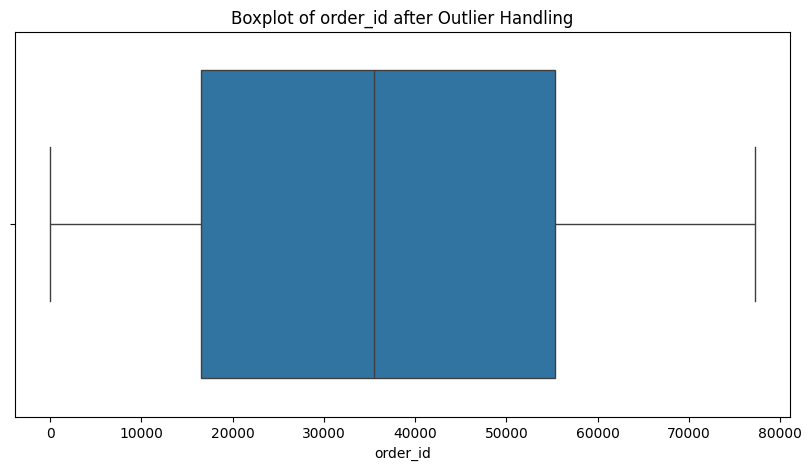

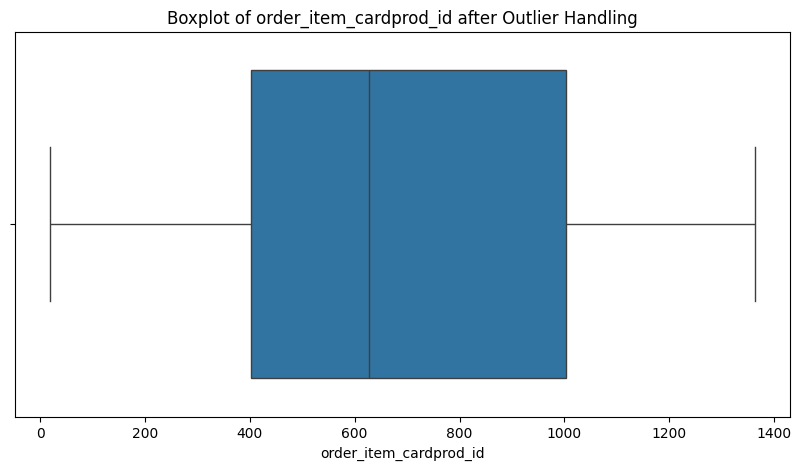

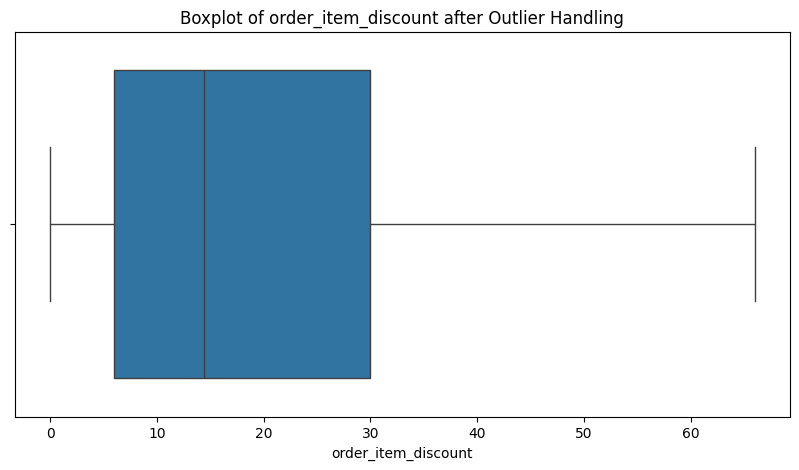

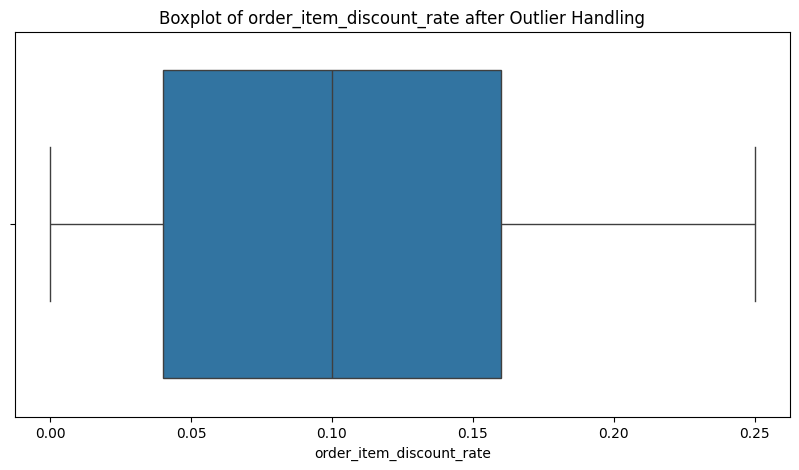

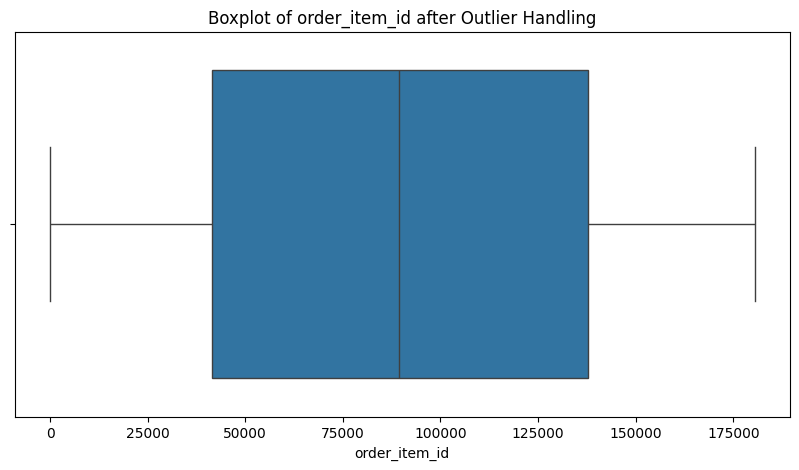

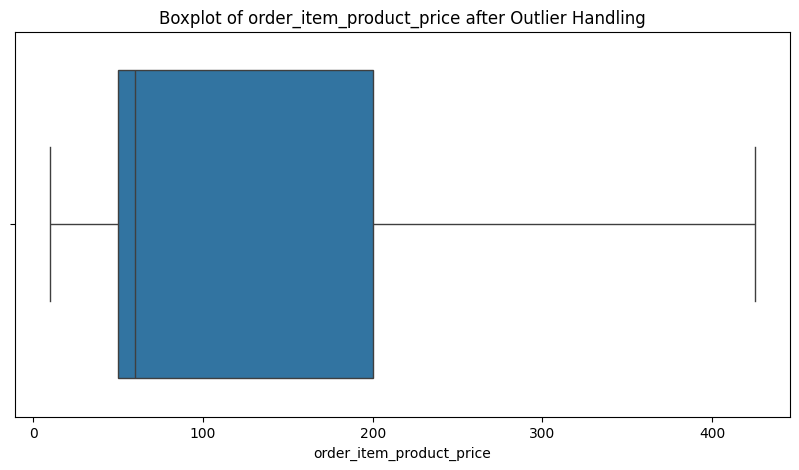

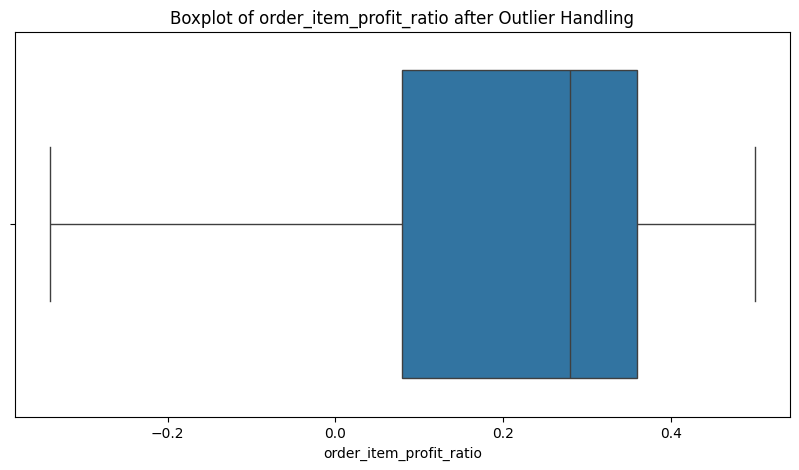

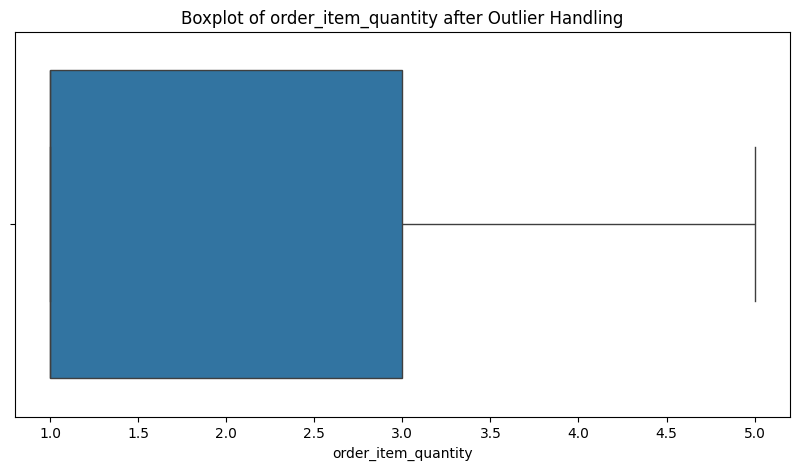

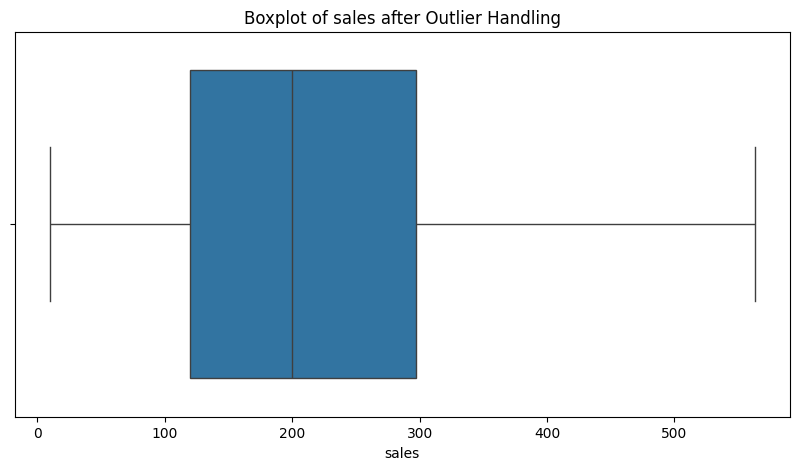

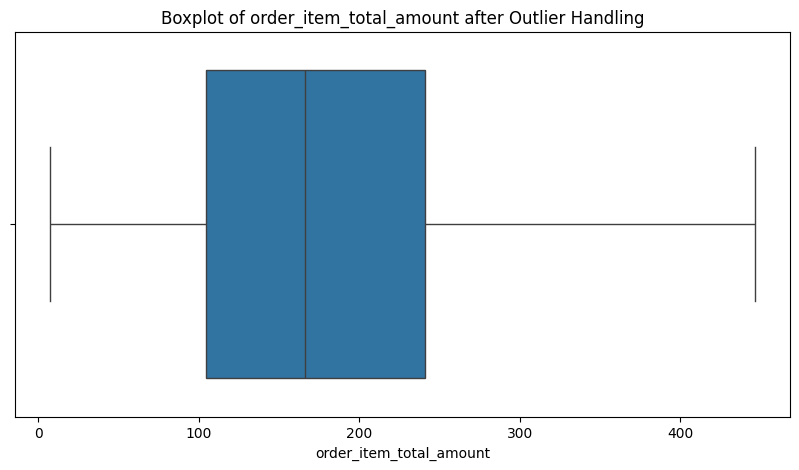

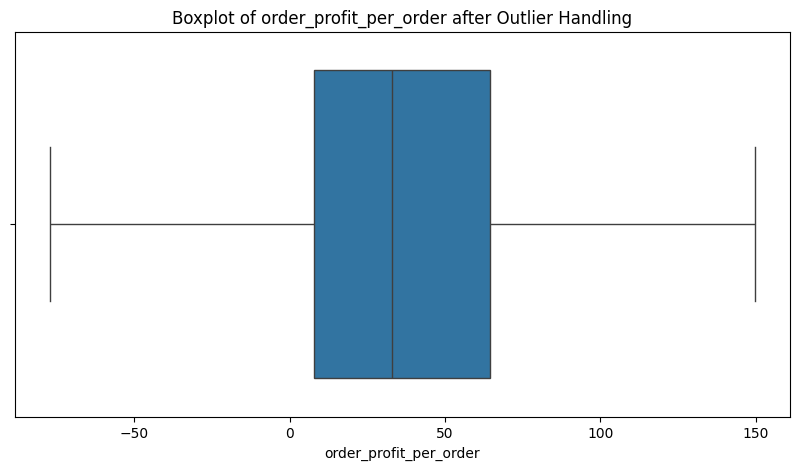

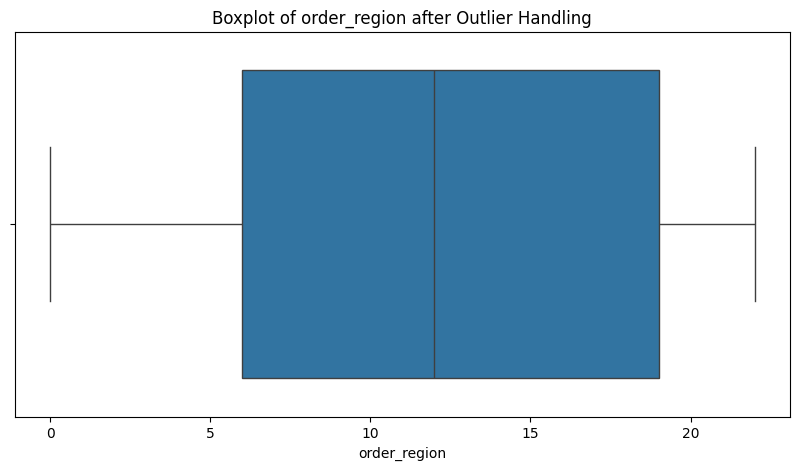

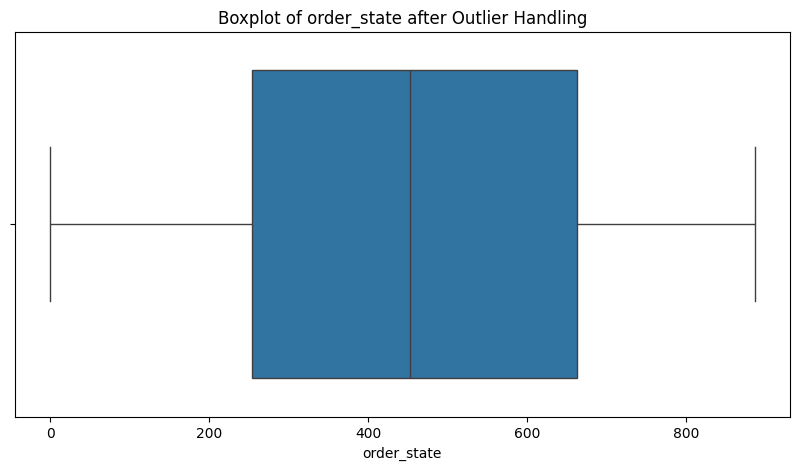

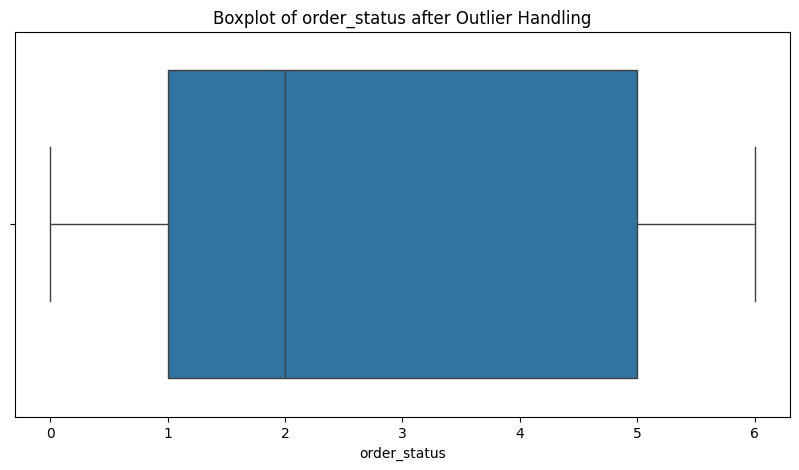

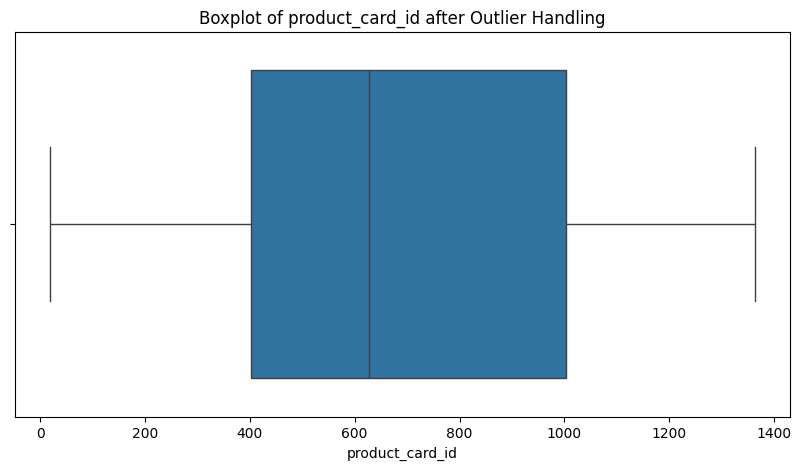

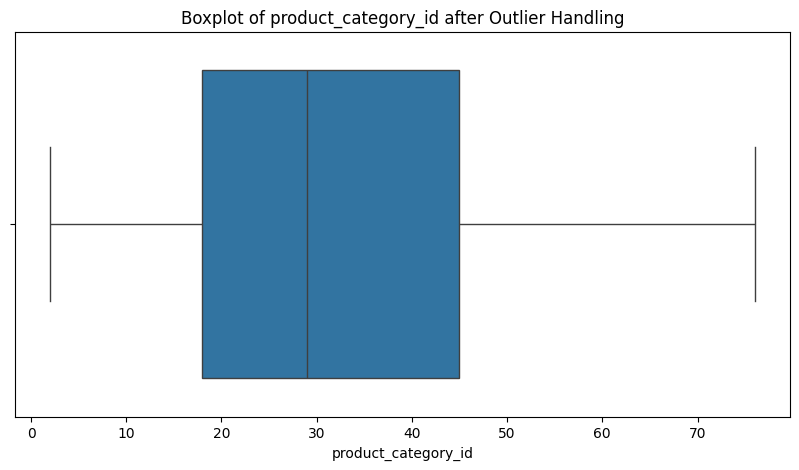

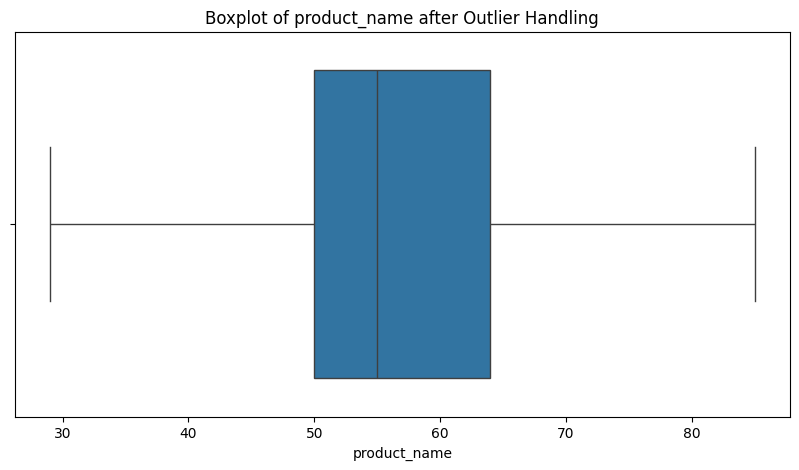

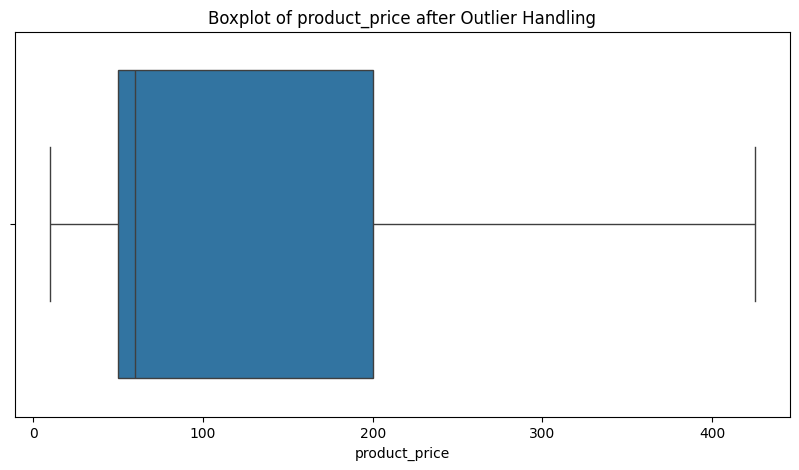

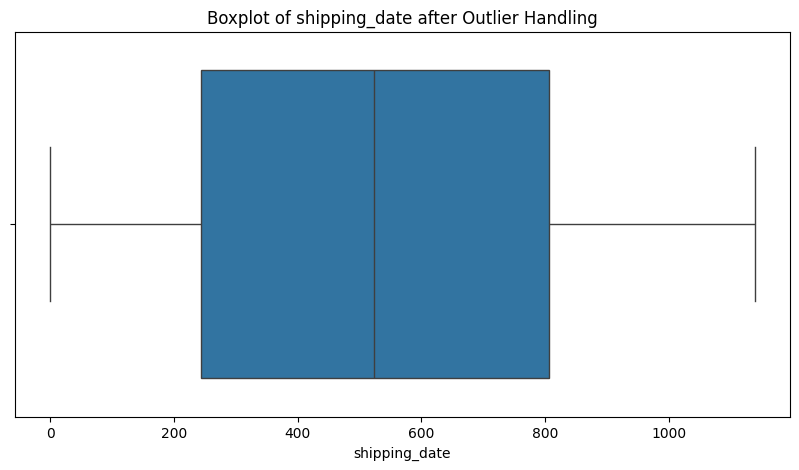

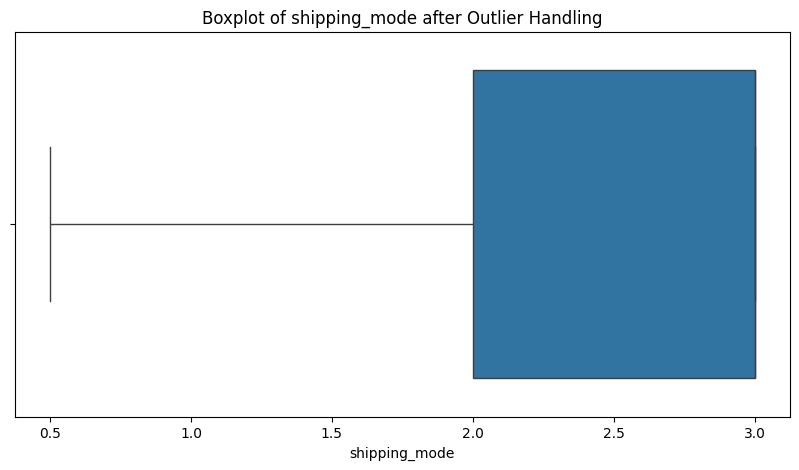

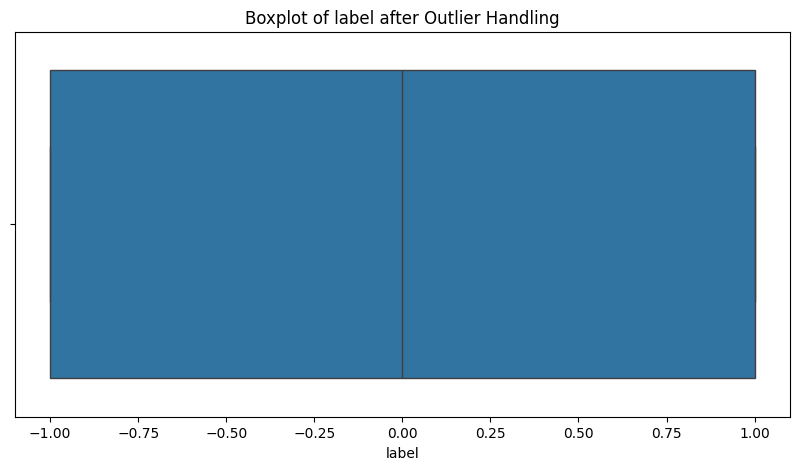

In [39]:
import numpy as np

# Handling outliers by capping them to a threshold based on IQR
for column in numerical_columns:
    Q1 = df_balanced[column].quantile(0.25)
    Q3 = df_balanced[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df_balanced[column] = np.where(df_balanced[column] < lower_bound, lower_bound, df_balanced[column])
    df_balanced[column] = np.where(df_balanced[column] > upper_bound, upper_bound, df_balanced[column])

# Verify that outliers have been capped by plotting again
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_balanced[column])
    plt.title(f'Boxplot of {column} after Outlier Handling')
    plt.show()

In [40]:
print(df_balanced['label'].value_counts())


label
-1.0    3545
 1.0    3028
 0.0    3028
Name: count, dtype: int64


# Splitting the Data

In [41]:
# Splitting the data into features (X) and target (y)
X = df_balanced.drop(columns=['label'])  # Drop the target column 'label'
y = df_balanced['label']

In [42]:
from sklearn.model_selection import train_test_split

# Train-test split with stratification to handle class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [43]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to the numerical columns only (not to the categorical or label columns)
scaler = StandardScaler()
# Fit the scaler on the training data (only on numerical features)
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


# Model Building

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [45]:
# Initialize models with hyperparameter tuning
models = {
    # Logistic Regression: Tune the regularization parameter C
    "Logistic Regression (C=0.5)": LogisticRegression(max_iter=1000, C=0.5),
    "Logistic Regression (C=1.0)": LogisticRegression(max_iter=1000, C=1.0),
    "Logistic Regression (C=2.0)": LogisticRegression(max_iter=1000, C=2.0),

    # Decision Tree: Tune depth of the tree
    "Decision Tree (depth=8)": DecisionTreeClassifier(max_depth=8, random_state=42),
    "Decision Tree (depth=12)": DecisionTreeClassifier(max_depth=12, random_state=42),
    "Decision Tree (depth=20)": DecisionTreeClassifier(max_depth=20, random_state=42),

    # Random Forest: Tune the number of trees (n_estimators) and maximum depth
    "Random Forest (100 estimators, depth=10)": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Random Forest (200 estimators, depth=15)": RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42),
    "Random Forest (300 estimators, depth=20)": RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42),

    # SVM: Tune the kernel and regularization parameter C
    "SVM (linear kernel, C=1.0)": SVC(kernel='linear', C=1.0),
    "SVM (linear kernel, C=2.0)": SVC(kernel='linear', C=2.0),
    "SVM (rbf kernel, C=1.0)": SVC(kernel='rbf', C=1.0),
    "SVM (rbf kernel, C=2.0)": SVC(kernel='rbf', C=2.0),

    # KNN: Tune the number of neighbors (n_neighbors)
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "KNN (k=7)": KNeighborsClassifier(n_neighbors=7)
}


In [46]:
# Initialize variables to store the best model information
best_model = None
best_model_name = ""
best_train_accuracy = 0
best_test_accuracy = 0

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...\n")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on training data
    train_predictions = model.predict(X_train)

    # Predict on testing data
    test_predictions = model.predict(X_test)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, train_predictions) * 100
    test_accuracy = accuracy_score(y_test, test_predictions) * 100

    print(f"{model_name} Training Accuracy: {train_accuracy:.2f}%")
    print(f"{model_name} Testing Accuracy: {test_accuracy:.2f}%")

    print("Classification Report (Testing Data):")
    print(classification_report(y_test, test_predictions, labels=[-1, 0, 1], zero_division=0))

    # Update the best model if this model has the highest training accuracy
    if train_accuracy > best_train_accuracy:
        best_train_accuracy = train_accuracy
        best_model = model
        best_model_name = model_name

    # Track the highest testing accuracy
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy



Evaluating Logistic Regression (C=0.5)...

Logistic Regression (C=0.5) Training Accuracy: 54.92%
Logistic Regression (C=0.5) Testing Accuracy: 54.55%
Classification Report (Testing Data):
              precision    recall  f1-score   support

          -1       0.52      0.97      0.68       709
           0       0.37      0.03      0.06       606
           1       0.63      0.56      0.59       606

    accuracy                           0.55      1921
   macro avg       0.51      0.52      0.44      1921
weighted avg       0.51      0.55      0.46      1921


Evaluating Logistic Regression (C=1.0)...

Logistic Regression (C=1.0) Training Accuracy: 54.93%
Logistic Regression (C=1.0) Testing Accuracy: 54.55%
Classification Report (Testing Data):
              precision    recall  f1-score   support

          -1       0.52      0.97      0.68       709
           0       0.37      0.03      0.06       606
           1       0.63      0.56      0.59       606

    accuracy           

In [47]:
# Define a threshold for acceptable testing accuracy
acceptable_test_accuracy_threshold = 0.9 * best_test_accuracy

# Initialize variables to store accuracies and model names
model_names = []
train_accuracies = []
test_accuracies = []

# Collect the accuracies and model names from the previous code
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on training and testing data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_predictions) * 100
    test_accuracy = accuracy_score(y_test, test_predictions) * 100

    # Store the accuracies and model names
    model_names.append(model_name)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


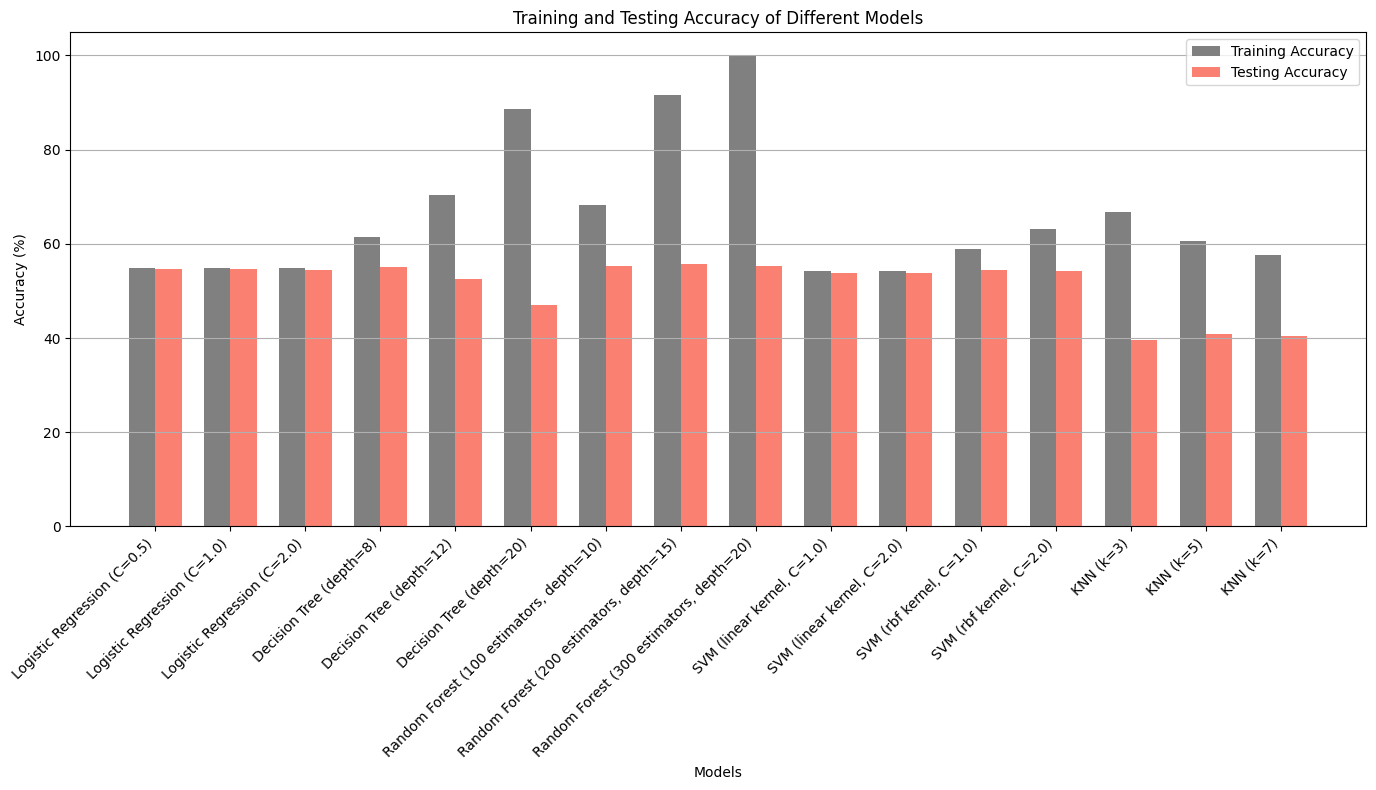

In [48]:
# Plot the training and testing accuracies for different models
plt.figure(figsize=(14, 8))
x = range(len(model_names))

# Bar width
bar_width = 0.35

# Plotting bars
plt.bar(x, train_accuracies, width=bar_width, label='Training Accuracy', align='center', color='grey')
plt.bar([i + bar_width for i in x], test_accuracies, width=bar_width, label='Testing Accuracy', align='center', color='salmon')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy of Different Models')
plt.xticks([i + bar_width / 2 for i in x], model_names, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()


In [49]:
# Final evaluation and prediction using the best model
final_test_accuracy = accuracy_score(y_test, best_model.predict(X_test)) * 100

if final_test_accuracy >= acceptable_test_accuracy_threshold:
    print(f"\nFinal Evaluation of the Best Model ({best_model_name}):\n")
    final_predictions = best_model.predict(X_test)
    train_predictions = best_model.predict(X_train)

    print(f"Best Model Training Accuracy: {accuracy_score(y_train, train_predictions) * 100:.2f}%")
    print(f"Best Model Testing Accuracy: {accuracy_score(y_test, final_predictions) * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, final_predictions, labels=[-1, 0, 1], zero_division=0))
else:
    print("The model with the highest training accuracy does not meet the acceptable testing accuracy threshold.")


Final Evaluation of the Best Model (Random Forest (300 estimators, depth=20)):

Best Model Training Accuracy: 99.88%
Best Model Testing Accuracy: 55.39%
Classification Report:
              precision    recall  f1-score   support

          -1       0.52      0.94      0.67       709
           0       0.48      0.16      0.23       606
           1       0.69      0.50      0.58       606

    accuracy                           0.55      1921
   macro avg       0.56      0.53      0.49      1921
weighted avg       0.56      0.55      0.50      1921

